# Thyroid Cancer Recurrence

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Study of the features

In [2]:
data=pd.read_csv("Thyroid_Diff.csv")
data.describe(include="all")

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is 16 different features in the data.
The target variable is "Recurred" and it is categorial. It is a supervised learning classification problem (2 classes "Yes"/"No").
The question here : What are the features which have an impact on the fact that a cancer reapears ?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

There are no missing values and the types of the features are already consistent (integer or category).


In [4]:
data[data.duplicated()].shape[0]

19

In this medicine context, there are 383 invidual patients, among them are 19 reaparences but we trust the dataset and we consider that all patients different.

### Visualisation

In [5]:
# Configuration for better graphics
plt.style.use('default')  # Utiliser le style par défaut
sns.set_theme()  # Nouveau style Seaborn
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100

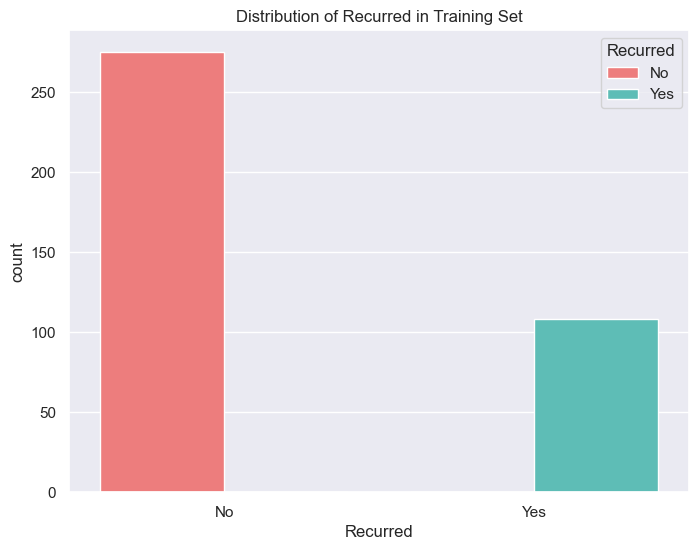

Recurred
No     275
Yes    108
Name: count, dtype: int64
Number of duplicates in the data base : 19
Number of missing values in each column: 0


In [6]:
# Number of people having a recurrence, display the counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Recurred', hue='Recurred', palette=['#FF6B6B', '#4ECDC4'])
plt.title('Distribution of Recurred in Training Set')
plt.show()
print(data['Recurred'].value_counts())

# Number of duplicates
n_duplicates = data.duplicated().sum()
print('Number of duplicates in the data base :', n_duplicates)
# We don't remove duplicates as they may represent different observations.

# Missing values
n_missing = data.isnull().sum().sum()
print('Number of missing values in each column:', n_missing)

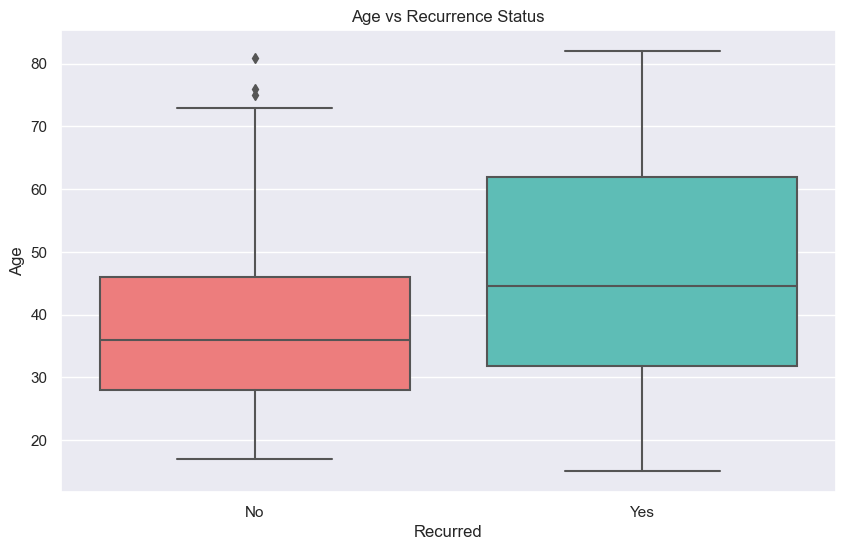

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


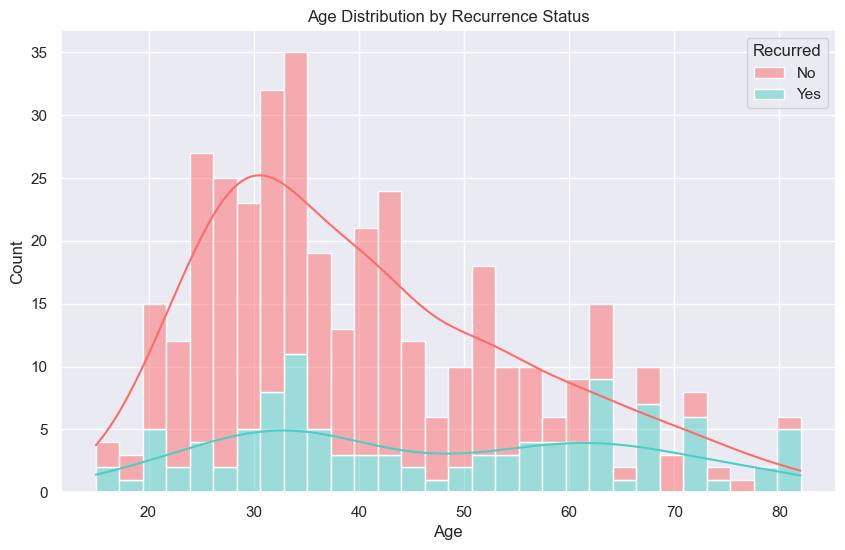

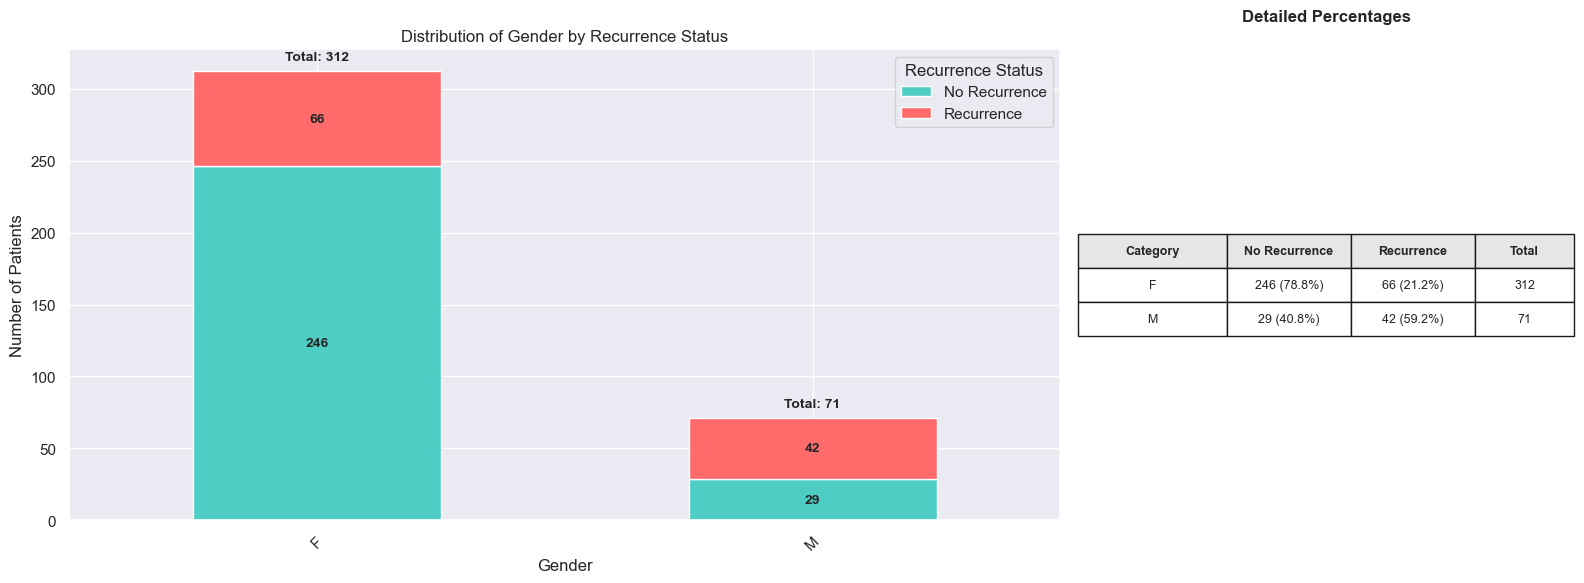

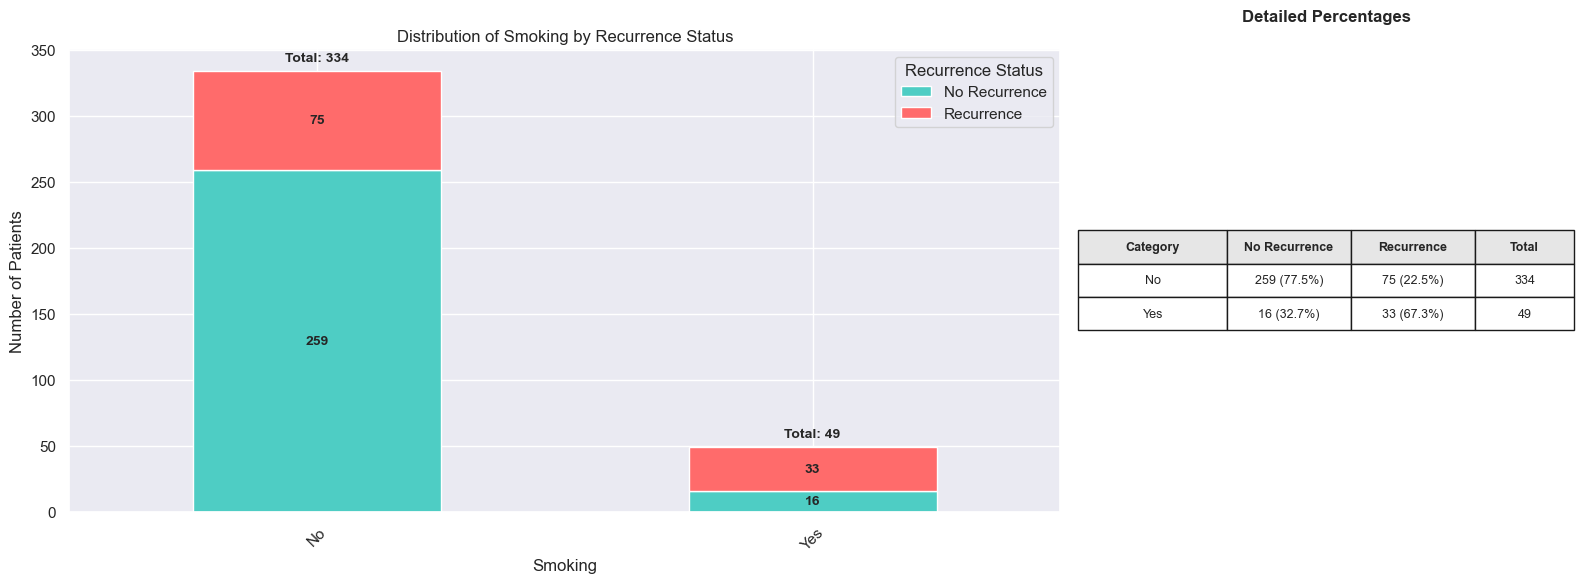

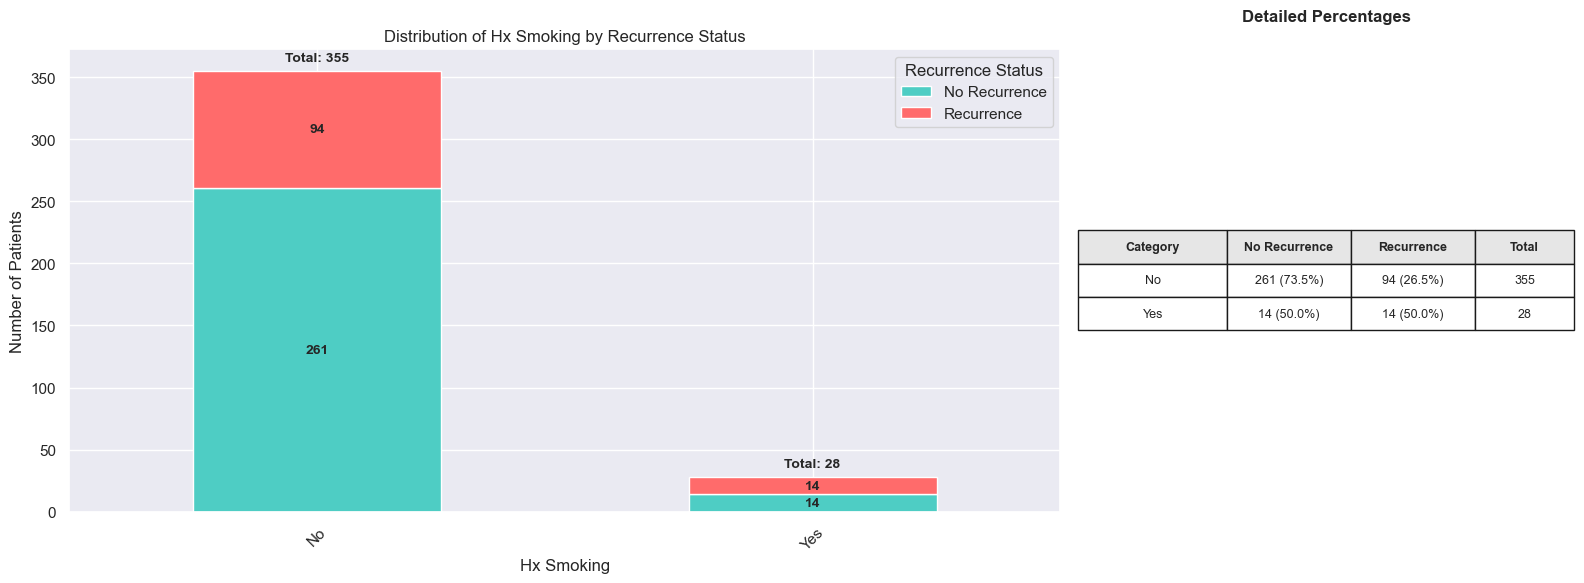

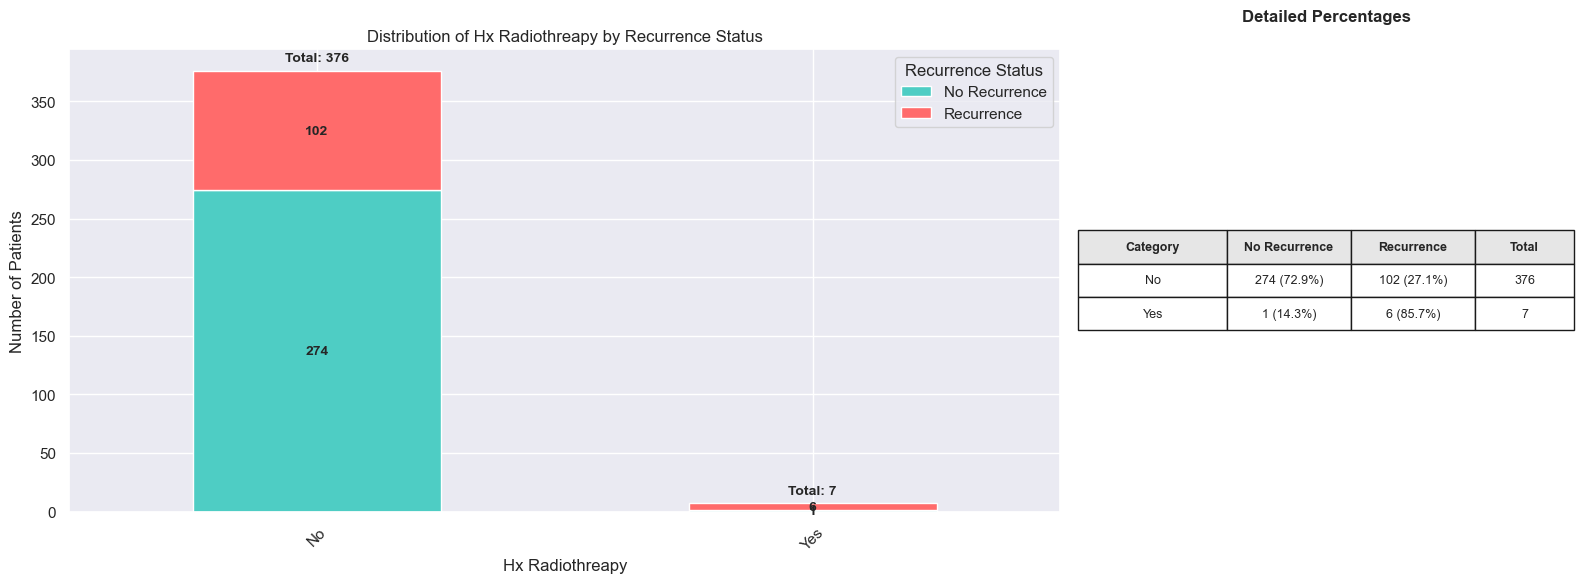

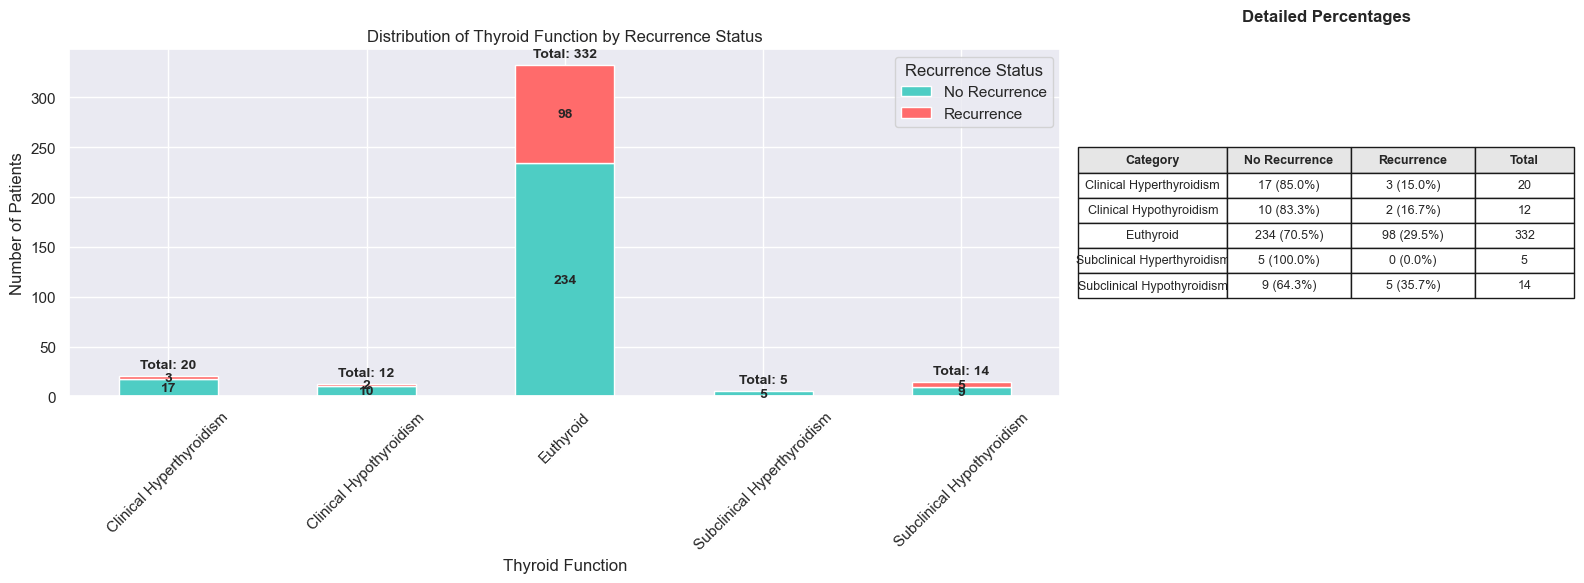

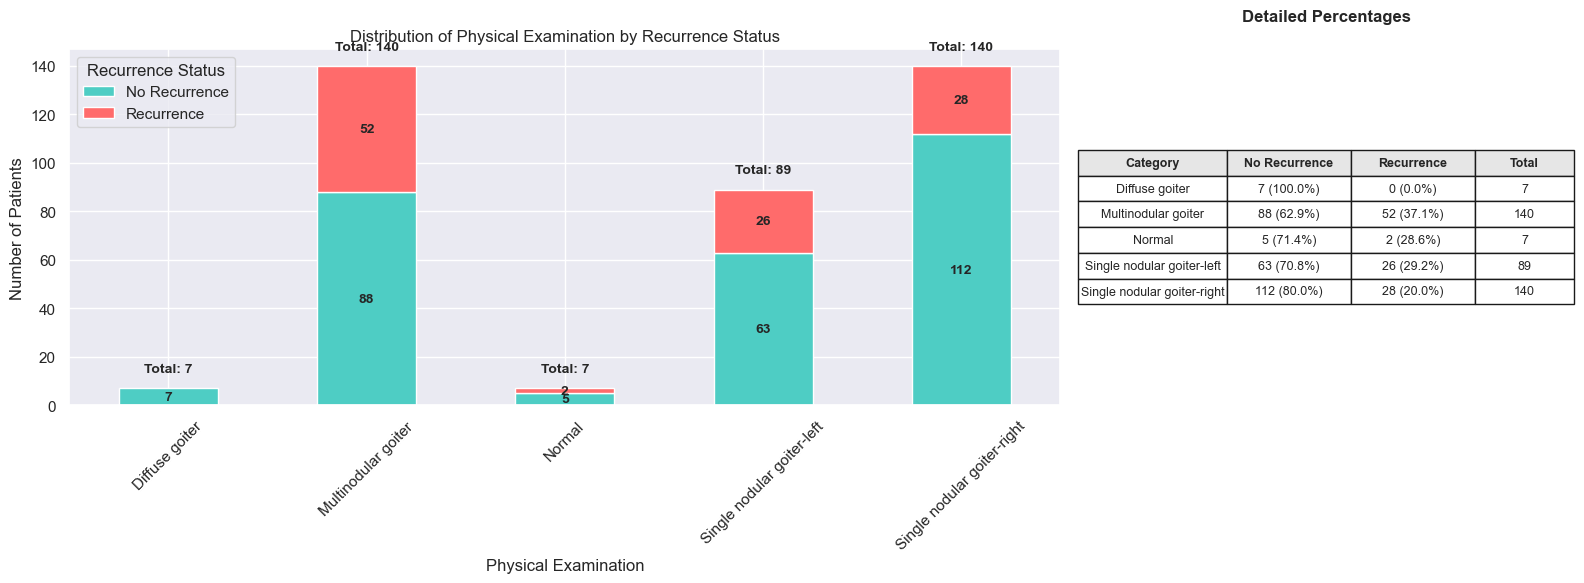

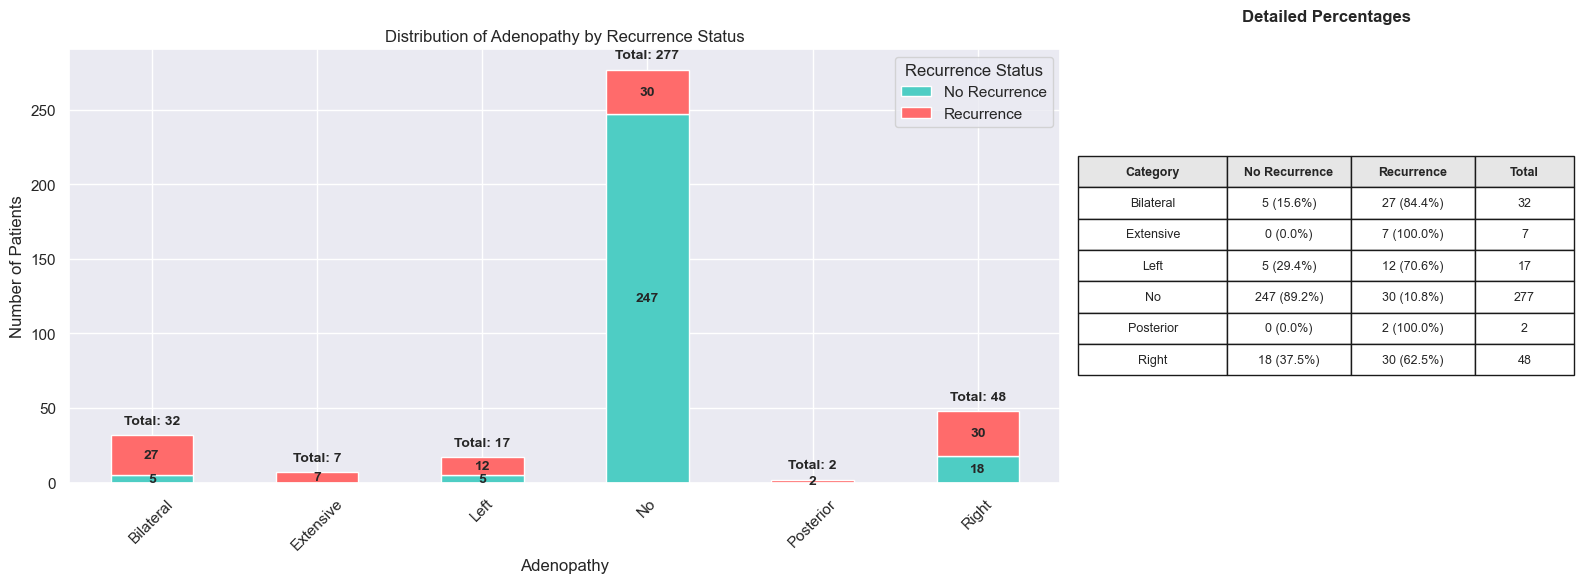

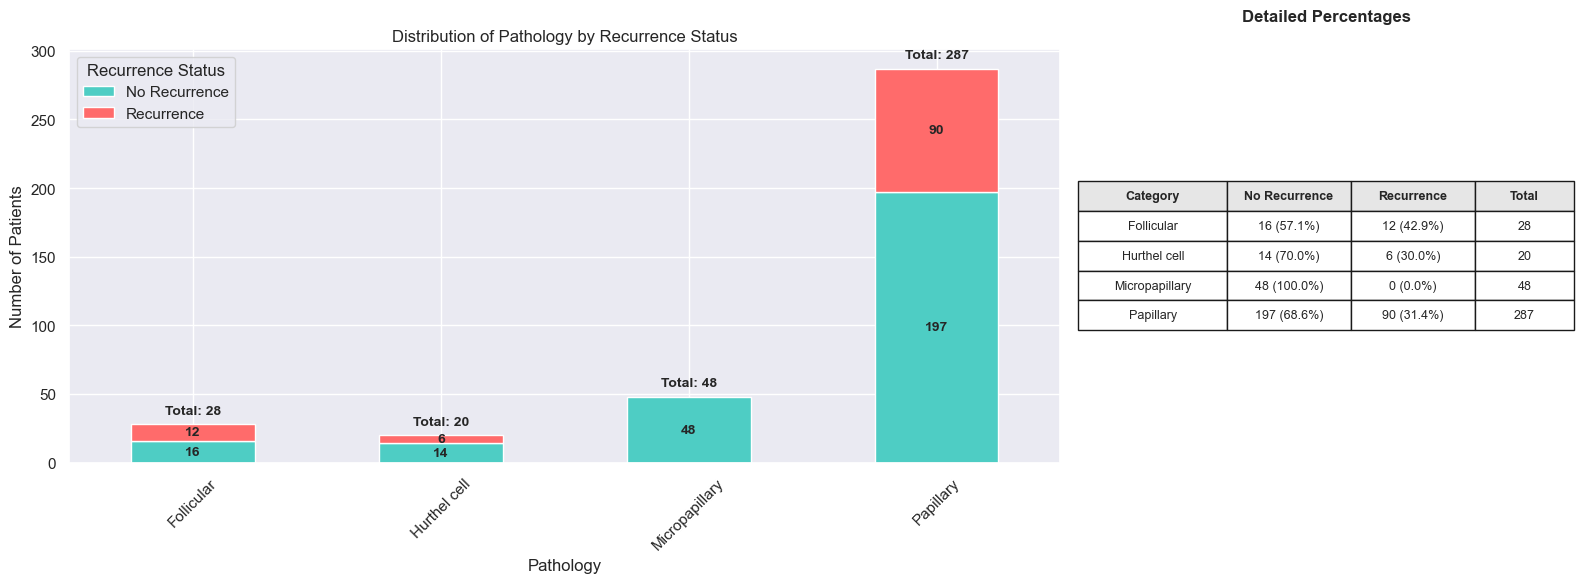

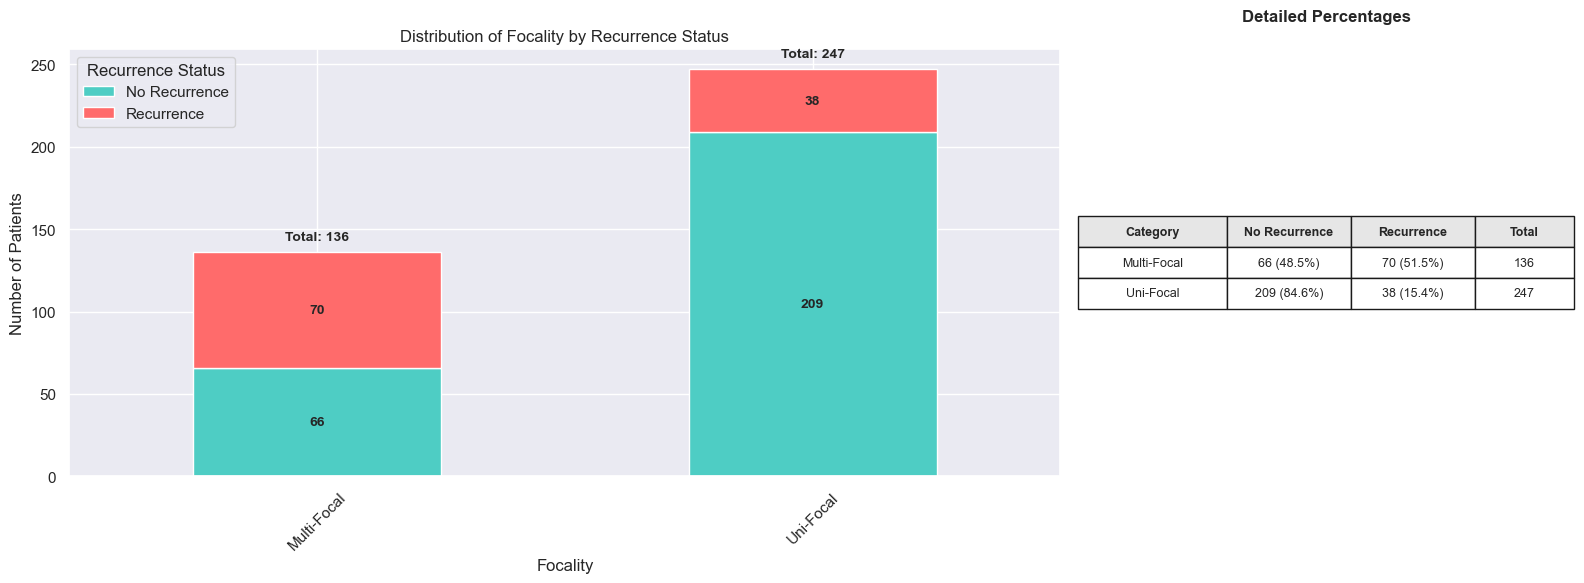

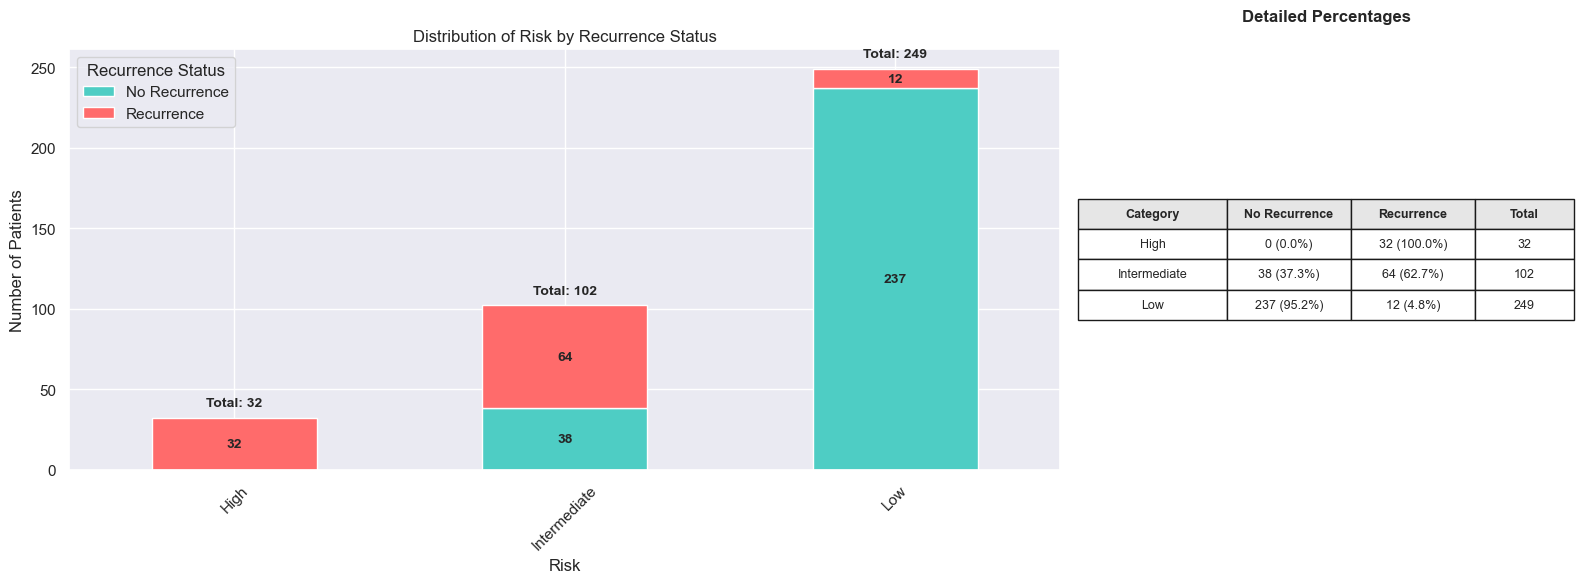

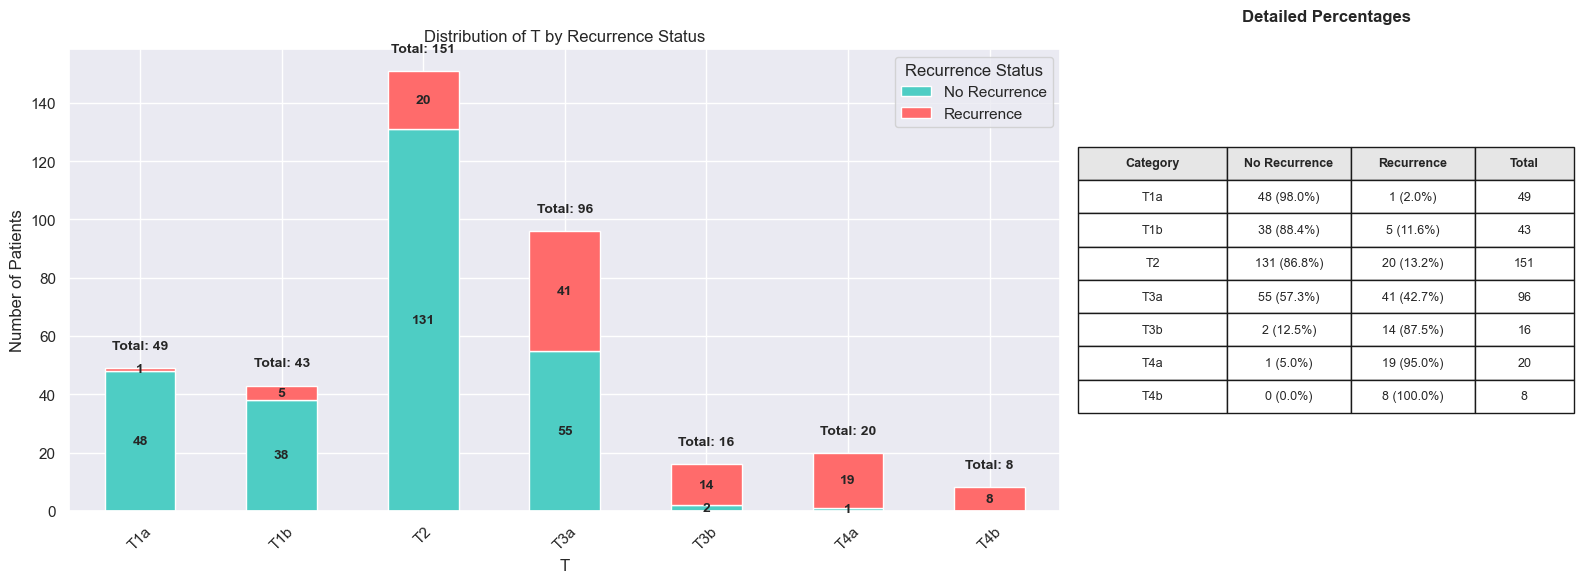

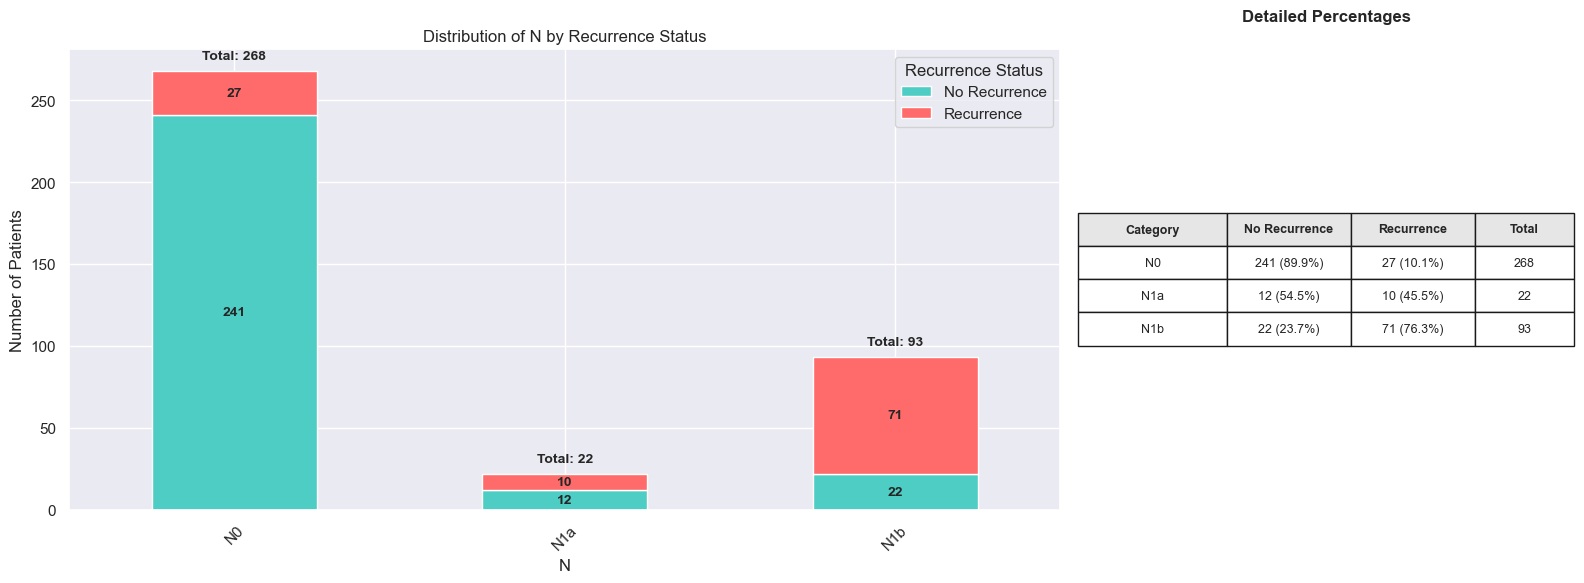

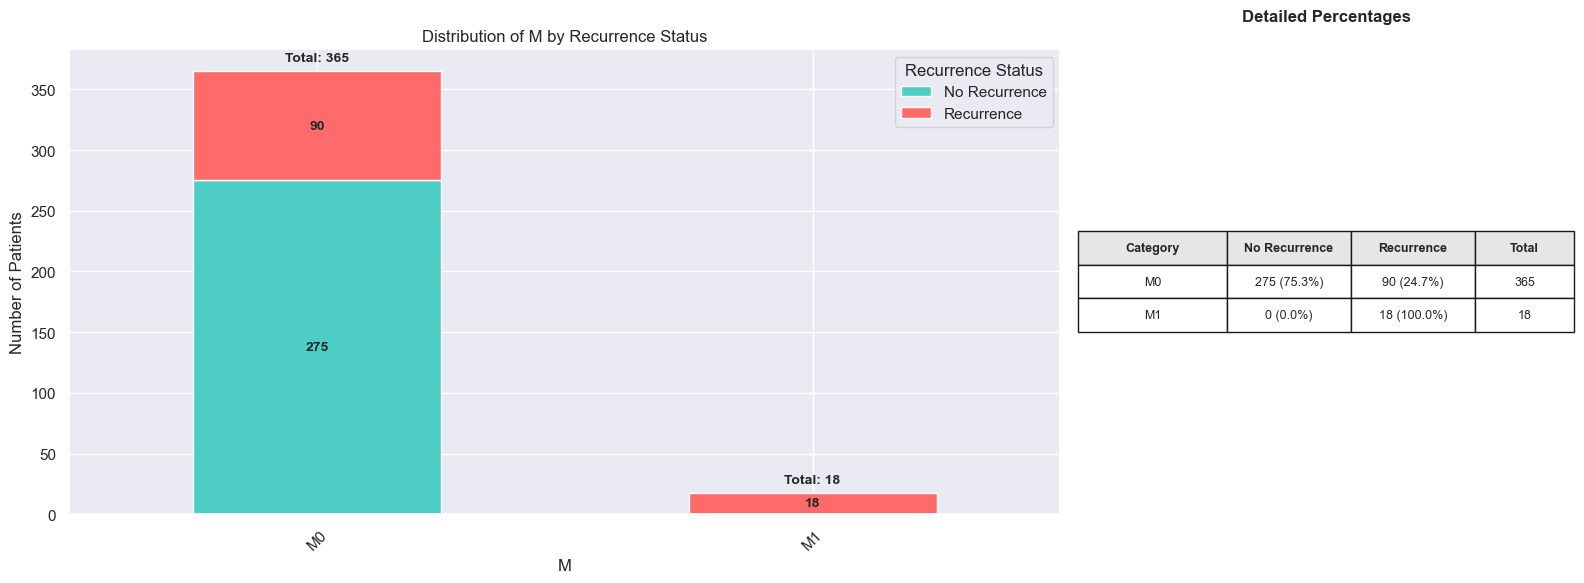

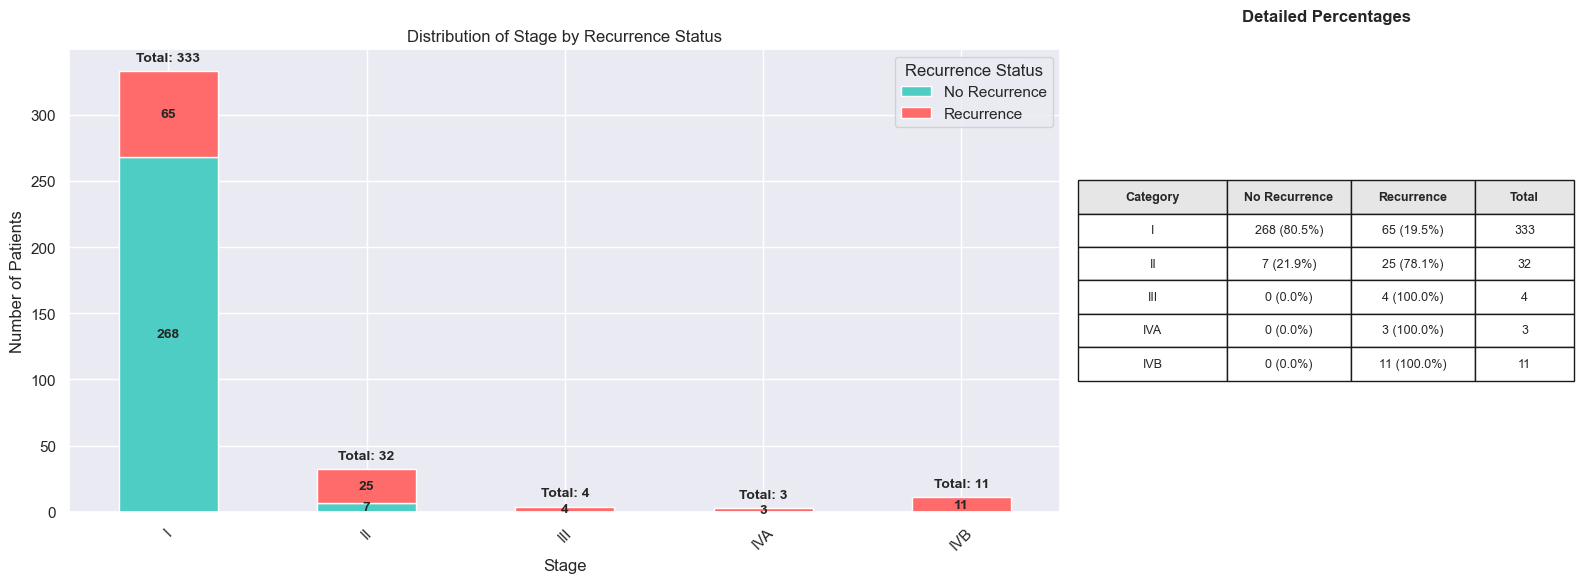

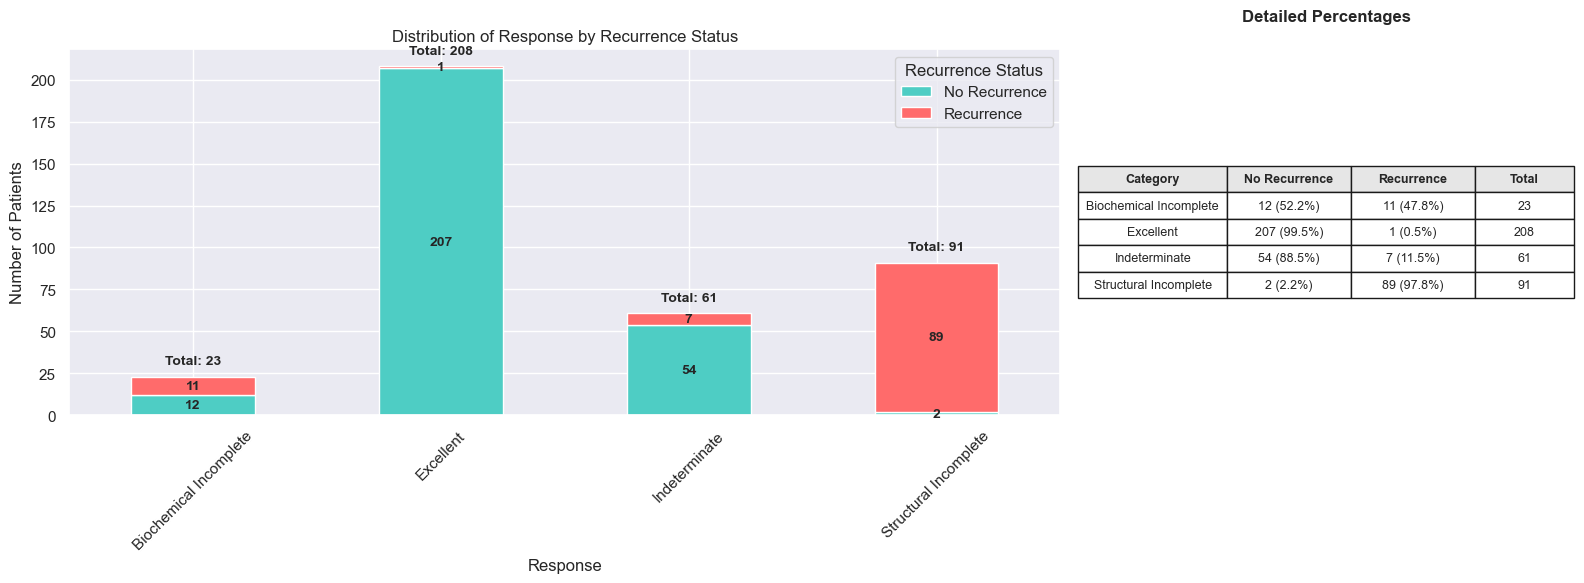

In [7]:
# ============== Study of variables ============== 

# Boxplot of age with cancer recurrence
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Recurred', y='Age', palette=['#FF6B6B', '#4ECDC4'])
plt.title('Age vs Recurrence Status')
plt.show()

# Histogram of age with cancer recurrence
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Recurred', multiple='stack', bins=30, kde=True, palette=['#FF6B6B', '#4ECDC4'])
plt.title('Age Distribution by Recurrence Status')
plt.show()

# Create stacked bar plots for each categorical variable
categorical_columns = data.drop(columns=['Recurred', 'Age'])
for col in categorical_columns:
    
    # Calculate crosstab for stacked bars
    cross_tab_counts = pd.crosstab(data[col], data['Recurred'])
    cross_tab_pct = pd.crosstab(data[col], data['Recurred'], normalize='index') * 100
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})
    
    # Create stacked bar plot (left side)
    cross_tab_counts.plot(kind='bar', stacked=True, ax=ax1,
                         color=['#4ECDC4', '#FF6B6B'])
    
    # Add only count labels on each segment of the bars (no percentages at all)
    for i, category in enumerate(cross_tab_counts.index):
        cumulative_height = 0
        total = cross_tab_counts.loc[category].sum()
        
        for j, recurrence_status in enumerate(cross_tab_counts.columns):
            count = cross_tab_counts.loc[category, recurrence_status]
            
            if count > 0:  # Only add label if count > 0
                # Position label in the middle of the segment
                label_height = cumulative_height + count / 2
                ax1.text(i, label_height, f'{count}', 
                        ha='center', va='center', fontweight='bold', fontsize=10)
            
            cumulative_height += count
        
        # Add total count on top of each bar
        ax1.text(i, total + max(cross_tab_counts.sum()) * 0.02, f'Total: {total}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax1.set_title(f'Distribution of {col} by Recurrence Status')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Number of Patients')
    ax1.legend(title='Recurrence Status', labels=['No Recurrence', 'Recurrence'])
    ax1.tick_params(axis='x', rotation=45)
    
    # Create percentage table (right side)
    ax2.axis('off')  # Remove axes for table
    
    # Prepare table data
    table_data = []
    table_data.append(['Category', 'No Recurrence', 'Recurrence', 'Total'])
    
    for category in cross_tab_counts.index:
        row = [str(category)]
        for recurrence_status in cross_tab_counts.columns:
            count = cross_tab_counts.loc[category, recurrence_status]
            pct = cross_tab_pct.loc[category, recurrence_status]
            row.append(f'{count} ({pct:.1f}%)')
        
        total = cross_tab_counts.loc[category].sum()
        row.append(f'{total}')
        table_data.append(row)
    
    # Create table
    table = ax2.table(cellText=table_data[1:], colLabels=table_data[0],
                     cellLoc='center', loc='center',
                     colWidths=[0.3, 0.25, 0.25, 0.2])
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    # Style header row
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#E6E6E6')
        table[(0, i)].set_text_props(weight='bold')
    
    ax2.set_title('Detailed Percentages', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()


We will now encode the categorial variables : (it is necessary to apply machine learning methods)

## One Hot Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# List of categorical columns with more than 2 unique values
multi_category_cols = [col for col in categorical_cols if data[col].nunique() > 2]

# list of categorical columns with 2 unique values
binary_category_cols = [col for col in categorical_cols if data[col].nunique() == 2]


# Encode categorical columns with more than 2 unique values
data = pd.get_dummies(data, columns=multi_category_cols, dtype=int)

# Encode categorical columns with 2 unique values (use LabelEncoder)
for col in binary_category_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

    # Display the encoding
    print(f"\n{col}:")
    for i, classe in enumerate(le.classes_):
        print(f"{i} -> {classe}")

df_one_hot_encoder = data.copy()


Gender:
0 -> F
1 -> M

Smoking:
0 -> No
1 -> Yes

Hx Smoking:
0 -> No
1 -> Yes

Hx Radiothreapy:
0 -> No
1 -> Yes

Focality:
0 -> Multi-Focal
1 -> Uni-Focal

M:
0 -> M0
1 -> M1

Recurred:
0 -> No
1 -> Yes


There are 50 columns with the One-Hot-Encoding method.

## Other encoding (for Random Forest)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
data_to_encode = data.select_dtypes(include=['object'])
encoded_data = OrdinalEncoder().fit_transform(data_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=data_to_encode.columns)
df_ordinal_encoder = pd.concat([data.select_dtypes(exclude=['object']).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Convert the encoded DataFrame to int64 type
df_ordinal_encoder = df_ordinal_encoder.astype('int64')
df_ordinal_encoder.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,M,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,N_N1b,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## K-Nearest Neighbors Classification

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df_one_hot_encoder.drop(columns=["Recurred"])
y = df_one_hot_encoder["Recurred"]
# Split the data into training, validation and testing sets by conserving the distribution of the target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

In [12]:
# Renormalize the 'Age' column
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_temp["Age"] = scaler.transform(X_temp[["Age"]])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [13]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Perform grid search to find the best number of neighbors and best distance for KNN
param_grid_knn = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train, y_train)

print("Best parameters from grid search:", grid_search_knn.best_params_)

Best parameters from grid search: {'metric': 'euclidean', 'n_neighbors': 3}


In [15]:
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

Classification report:
               precision    recall  f1-score   support

No Recurrence       0.93      0.96      0.95        56
   Recurrence       0.89      0.81      0.85        21

     accuracy                           0.92        77
    macro avg       0.91      0.89      0.90        77
 weighted avg       0.92      0.92      0.92        77



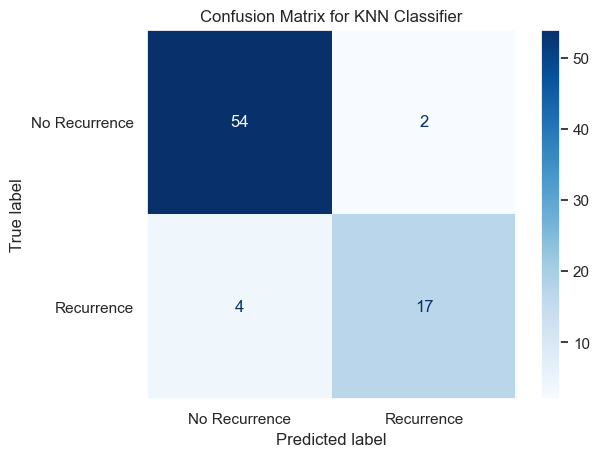

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification report:")
print(classification_report(y_test, y_pred_knn, target_names=['No Recurrence', 'Recurrence']))
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [17]:
# Search for the optimal threshold using the validation set
from sklearn.metrics import precision_recall_curve
# Predict probabilities on the validation set
y_val_proba = best_knn.predict_proba(X_val)[:, 1]

# Compute f2_score
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)
beta = 2  # Higher beta means more importance to recall
f2_score = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)

best_threshold = thresholds[f2_score.argmax()]
print(f" Optimal threshold (validation set) : {best_threshold:.3f}")

 Optimal threshold (validation set) : 0.667


Classification report with optimal threshold:
               precision    recall  f1-score   support

No Recurrence       0.93      0.96      0.95        56
   Recurrence       0.89      0.81      0.85        21

     accuracy                           0.92        77
    macro avg       0.91      0.89      0.90        77
 weighted avg       0.92      0.92      0.92        77



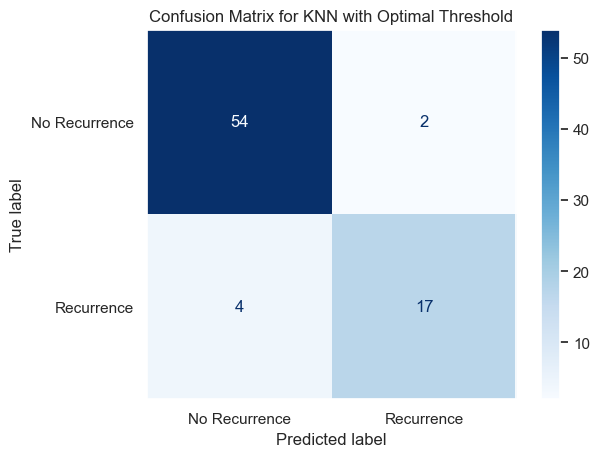

In [18]:
# Evaluate the model on the test set using the optimal threshold
y_test_proba = best_knn.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("Classification report with optimal threshold:")
print(classification_report(y_test, y_test_pred, target_names=['No Recurrence', 'Recurrence']))
# Display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for KNN with Optimal Threshold')
plt.show()

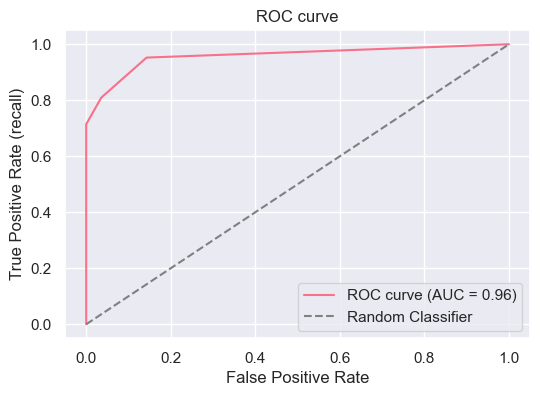

In [19]:
# Get ROC curve data and AUC score
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = best_knn.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (recall)')
plt.title('ROC curve')
plt.legend()
plt.grid(True)
plt.show()

## Logistic Regression

In [20]:
X = df_one_hot_encoder.drop(columns=["Recurred"])
y = df_one_hot_encoder["Recurred"]

#Split : 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

#Standardize the column "Age"
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_temp["Age"] = scaler.transform(X_temp[["Age"]])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=0)

In [21]:
# Training stage with cross validation to find the best hyperparameter
from sklearn.linear_model import LogisticRegressionCV

model_CV_l1 = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10, 100], # coefficients of regularization which are tested
    cv=5, # 5-fold cross validation
    penalty='l1',
    solver='liblinear',# suited for small datasets and L1 regularization
    scoring='f1'
).fit(X_train,y_train)

y_pred = model_CV_l1.predict(X_test)


Classification report:
               precision    recall  f1-score   support

No Recurrence       0.95      1.00      0.97        56
   Recurrence       1.00      0.86      0.92        21

     accuracy                           0.96        77
    macro avg       0.97      0.93      0.95        77
 weighted avg       0.96      0.96      0.96        77



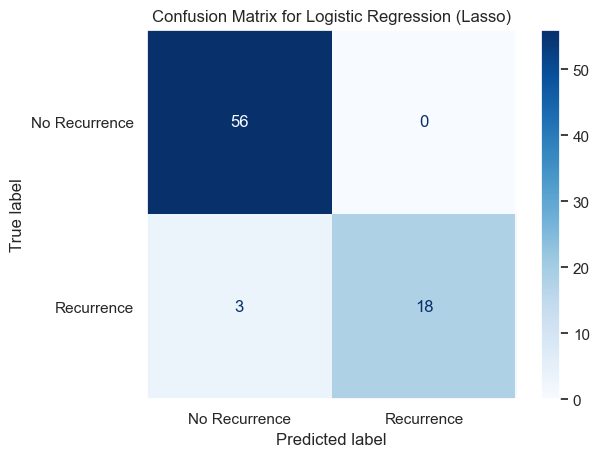

Coefficients of the model :
 [ 0.35483352  0.          0.          0.          0.         -0.1015821
  0.          0.          0.          0.          0.          0.
  0.          0.11057502  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.11176572  0.07652093  0.         -1.16519376
  0.          0.         -0.02331465  0.          0.          0.
  0.         -0.98382213  0.41276718  0.         -0.30956327  0.
  0.          0.          0.          0.65151013 -2.73432785 -0.73327625
  4.13218529] 
Intercept =  0.0


In [22]:
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=['No Recurrence', 'Recurrence']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for Logistic Regression (Lasso)')
plt.show()

print("Coefficients of the model :\n",model_CV_l1.coef_[0],"\nIntercept = ",model_CV_l1.intercept_[0])

In [23]:
# Optimize the threshold with the F1-score on the validation set
y_val_proba = model_CV_l1.predict_proba(X_val)[:, 1]  # probabilities  on the validation set

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)
# return 3 lists which correspond to the precision and 
# the recall for a corresponding threshold (choosen among y_proba)

beta = 2  # Higher beta means more importance to recall
f2_score = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)

best_threshold = thresholds[f2_score.argmax()]
print(f"\nOptimal threshold : {best_threshold:.3f}")


Optimal threshold : 0.214


Classification report with optimal threshold:
               precision    recall  f1-score   support

No Recurrence       0.98      0.96      0.97        56
   Recurrence       0.91      0.95      0.93        21

     accuracy                           0.96        77
    macro avg       0.95      0.96      0.95        77
 weighted avg       0.96      0.96      0.96        77



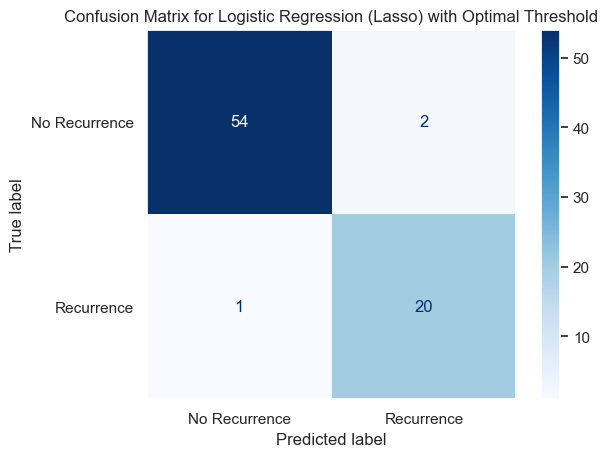

In [24]:
y_test_proba = model_CV_l1.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("Classification report with optimal threshold:")
print(classification_report(y_test, y_test_pred, target_names=['No Recurrence', 'Recurrence']))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for Logistic Regression (Lasso) with Optimal Threshold')
plt.show()

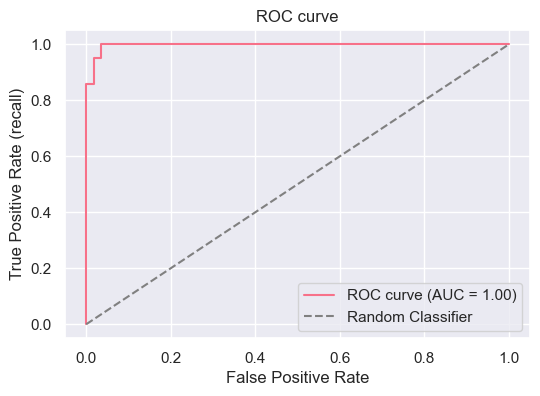

In [25]:
y_proba = model_CV_l1.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (recall)')
plt.title('ROC curve')
plt.legend()
plt.grid(True)
plt.show()

## Support Vector Machine (SVM)


In [26]:
X = df_one_hot_encoder.drop(columns=["Recurred"])
y = df_one_hot_encoder["Recurred"]

#Split : 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

scaler = StandardScaler() #Standardize the column "Age"
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_temp["Age"] = scaler.transform(X_temp[["Age"]])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=0)


In [27]:
# Training stage with cross validation to find the best hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_param = [
    {
        'kernel': ['linear', 'rbf','poly'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
        'class_weight': [None, 'balanced'], #balanced is good option when classes are unbalanced 
        'degree': [2, 3]
    }
    
]

svm = SVC(probability=True)
grid = GridSearchCV(svm, grid_param,cv=5,scoring='f1',verbose=2,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.001, class_weight=None, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END 

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': [None, 'balanced'], 'degree': [2, 3],
                          'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly']}],
             scoring='f1', verbose=2)

Best parameters: {'C': 0.001, 'class_weight': None, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Classification report:
               precision    recall  f1-score   support

No Recurrence       0.95      0.98      0.96        56
   Recurrence       0.95      0.86      0.90        21

     accuracy                           0.95        77
    macro avg       0.95      0.92      0.93        77
 weighted avg       0.95      0.95      0.95        77



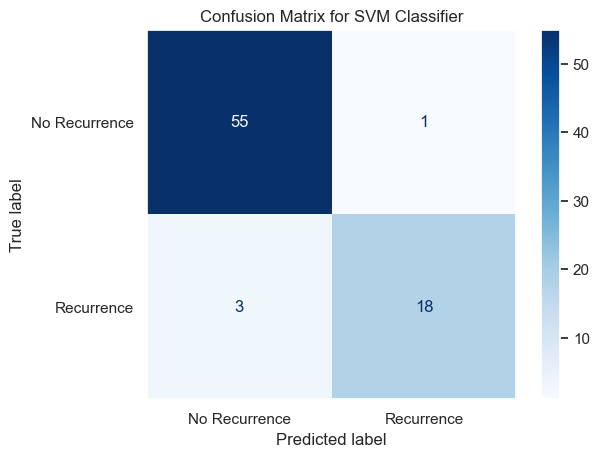

In [28]:
print("Best parameters:",grid.best_params_)

best_svm_model = grid.best_estimator_
y_pred = best_svm_model.predict(X_test)

print("Classification report:")
print(classification_report(y_test,y_pred, target_names=['No Recurrence', 'Recurrence']))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

In [29]:
# Optimize the threshold with the F1-score on the validation set
y_val_proba = best_svm_model.predict_proba(X_val)[:, 1] #probabilities  on the validation set

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)
#return 3 lists which correspond to the precision and 
#the recall for a corresponding threshold (choosen among y_proba)
beta = 2  # Higher beta means more importance to recall
f2_score = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)

best_threshold = thresholds[f2_score.argmax()]
print(f"\nOptimal threshold : {best_threshold:.3f}")


Optimal threshold : 0.344


Classification report with optimal threshold:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.95      0.90      0.93        21

    accuracy                           0.96        77
   macro avg       0.96      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



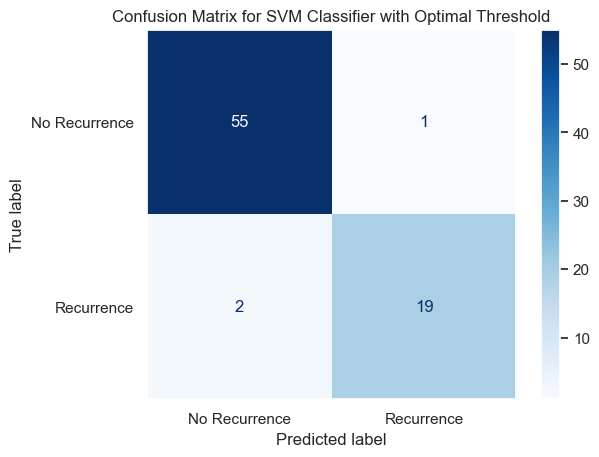

In [30]:
y_test_proba = best_svm_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)


print("Classification report with optimal threshold:")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for SVM Classifier with Optimal Threshold')
plt.show()

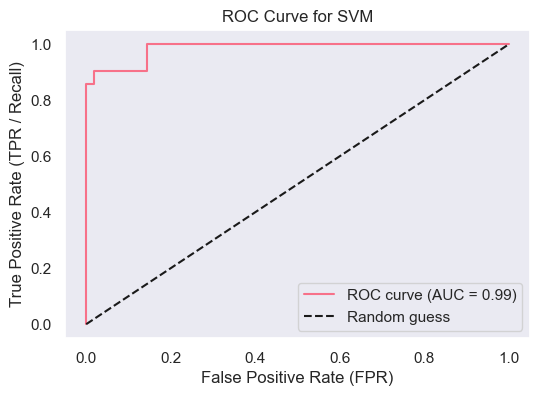

In [31]:
y_proba = best_svm_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.title("ROC Curve for SVM")
plt.legend()
plt.grid()
plt.show()

## Random forest

In [32]:
X = df_ordinal_encoder.drop(columns=['Recurred'])
y = df_ordinal_encoder['Recurred']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [33]:
# Estimate class weights for the training set
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))
print("Class weights:", class_weights)

Class weights: {0: 0.698170731707317, 1: 1.7615384615384615}


In [34]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150 ,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight=class_weights, random_state=0, n_jobs=-1),
    param_grid,
    scoring='recall', # maximize recall
    cv=5, # 5-fold cross-validation
    verbose=1
)

grid.fit(X_train, y_train)

print("Best params :", grid.best_params_)
print("Best recall on CV :", grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best params : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best recall on CV : 0.9538461538461538


Classification report:
               precision    recall  f1-score   support

No Recurrence       0.98      0.96      0.97        56
   Recurrence       0.91      0.95      0.93        21

     accuracy                           0.96        77
    macro avg       0.95      0.96      0.95        77
 weighted avg       0.96      0.96      0.96        77



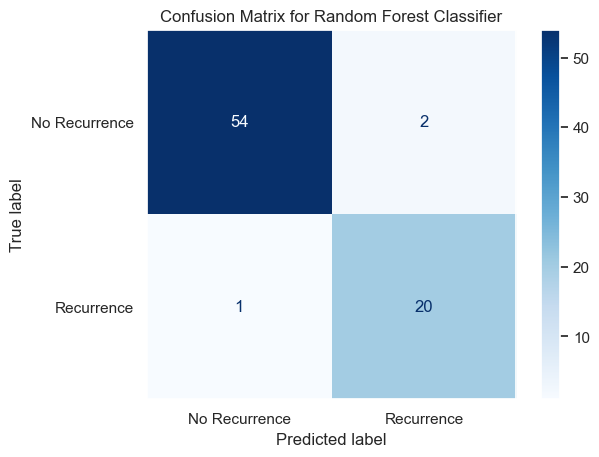

In [35]:
best_rfc_model = grid.best_estimator_
y_pred_best_rfc = best_rfc_model.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred_best_rfc, target_names=['No Recurrence', 'Recurrence']))
cm = confusion_matrix(y_test, y_pred_best_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [36]:
# Compute the optimal threshold using the validation set
from sklearn.metrics import precision_recall_curve
y_val_proba = best_rfc_model.predict_proba(X_val)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

beta = 2 # Higher beta means more importance to recall
f2_score = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)
best_threshold = thresholds[f2_score.argmax()]
print(f" Optimal threshold (validation) : {best_threshold:.3f}")


 Optimal threshold (validation) : 0.424


In [37]:
y_test_proba = best_rfc_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

Classification report with optimal threshold:
               precision    recall  f1-score   support

No Recurrence       0.98      0.95      0.96        56
   Recurrence       0.87      0.95      0.91        21

     accuracy                           0.95        77
    macro avg       0.93      0.95      0.94        77
 weighted avg       0.95      0.95      0.95        77



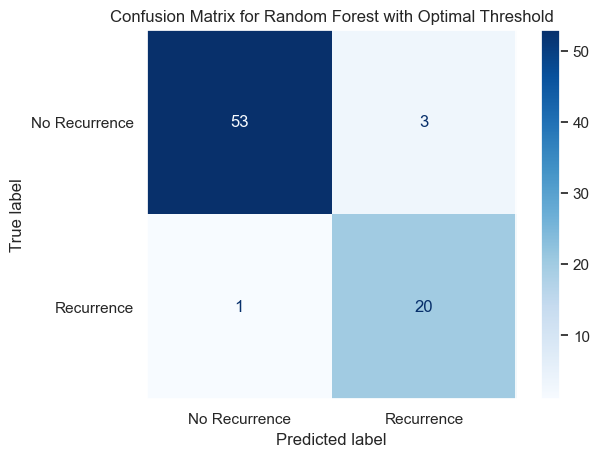

In [38]:
print("Classification report with optimal threshold:")
print(classification_report(y_test, y_test_pred, target_names=['No Recurrence', 'Recurrence']))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for Random Forest with Optimal Threshold')
plt.show()


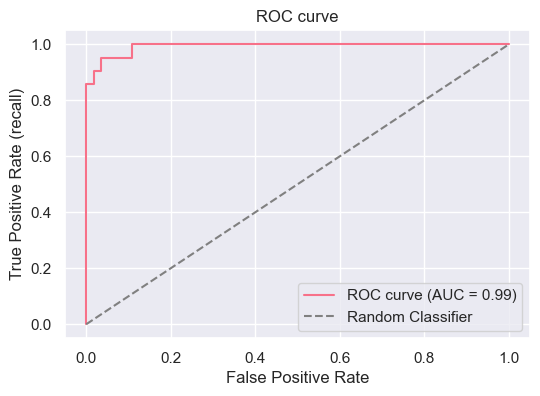

In [39]:
y_proba = best_rfc_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (recall)')
plt.title('ROC curve')
plt.legend()
plt.grid(True)
plt.show()

## Neural Network

In [40]:
X = df_one_hot_encoder.drop(columns=["Recurred"])
y = df_one_hot_encoder["Recurred"]

#Split : 60% train,20% test, 20% validation (10% validation for architecture, 10% validation for threshold)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

#Standardize the column "Age"
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_temp["Age"] = scaler.transform(X_temp[["Age"]])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=0)

X_val_archi, X_val_threshold, y_val_archi, y_val_threshold = train_test_split(
    X_val, y_val, test_size=0.5, random_state=0, stratify=y_val
)

In [41]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

def nn_creation(n_hidden, n_neurons): 
    #create a NN with "n_hidden" hidden layers and "n_neurons" neurons 
    #in each hidden layer.
    
    #n_hidden is an integer
    #n_neurons is a list of integer with length n_hidden
    
    model = tf.keras.Sequential()
    #input layer
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    
    #hidden layer(s)
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons[i], activation = 'relu'))
    
    #output
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy','recall','precision']
    )
    return model

In [ ]:
## 1 min to run
import os
import random

seed = 0
os.environ['PYTHONHASHSEED'] = str(seed) #Ensures consistent iteration order in sets, dictionaries, etc
os.environ['TF_DETERMINISTIC_OPS'] = '1'   #Ensures repeatable execution.
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


#test of each following form of NN:
architectures = [
    {"hidden_layers": 1, "neurons": [8]},
    {"hidden_layers": 1, "neurons": [32]},
    {"hidden_layers": 2, "neurons": [16,8]},
    {"hidden_layers": 2, "neurons": [32,16]},
    {"hidden_layers": 2, "neurons": [64,32]},
    {"hidden_layers": 3, "neurons": [32,16,8]},
    {"hidden_layers": 3, "neurons": [64,32,16]}
]

best_arch = ([],[],0,0,0)
f2=0
for arch in architectures:
    print(f"\nTest: {arch}")
    model = nn_creation(arch["hidden_layers"], arch["neurons"])
    
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=32,
                        verbose=0,
                        callbacks=[early_stopping_cb],
                        class_weight= {0 : 1 , 1: 2}) #we give more weight to class 1
    #we give more weight to class 1 
    #because there are 2 times less than class 0
    val_acc=history.history['val_accuracy']
    loss, accuracy, recall,precision= model.evaluate(X_val_archi, y_val_archi) # comme un dataset de test pour evaluer le modele
    print(f"validation (for architecture) accuracy: {accuracy:.3f}\nvalidation (for architecture) recall: {recall:.3f}")


    beta = 2  # Higher beta means more importance to recall
    f2_new = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    
    if f2_new>f2:
        f2=f2_new
        best_arch = (arch["hidden_layers"],arch["neurons"],accuracy,recall)

print("\n\nFinally we choose the neural network with the following architecture: \n",best_arch[0],
      "hidden layer(s) with ReLU activation\n",best_arch[1],"neurons.")
    
best_model_nn = nn_creation(best_arch[0], best_arch[1])

history = best_model_nn.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=32,
                        verbose=0,
                        callbacks=[early_stopping_cb],
                        class_weight= {0 : 1 , 1: 2}) #we give more weight to class 1
loss, accuracy, recall, precision= best_model_nn.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.3f}\nTest recall: {recall:.3f}")




Test: {'hidden_layers': 1, 'neurons': [8]}


2025-06-06 11:44:28.698798: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-06-06 11:44:28.700137: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9545 - loss: 0.1144 - precision: 0.9394 - recall: 0.9061


2025-06-06 11:44:37.524089: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:44:37.524663: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

validation (for architecture) accuracy: 0.947
validation (for architecture) recall: 0.909

Test: {'hidden_layers': 1, 'neurons': [32]}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9825 - loss: 0.0599 - precision: 0.9444 - recall: 1.0000


2025-06-06 11:44:46.511443: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:44:46.512439: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

validation (for architecture) accuracy: 0.974
validation (for architecture) recall: 1.000

Test: {'hidden_layers': 2, 'neurons': [16, 8]}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9825 - loss: 0.0453 - precision: 0.9444 - recall: 1.0000


2025-06-06 11:44:54.838901: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:44:54.839499: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

validation (for architecture) accuracy: 0.974
validation (for architecture) recall: 1.000

Test: {'hidden_layers': 2, 'neurons': [32, 16]}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9825 - loss: 0.0657 - precision: 0.9444 - recall: 1.0000
validation (for architecture) accuracy: 0.974
validation (for architecture) recall: 1.000

Test: {'hidden_layers': 2, 'neurons': [64, 32]}


2025-06-06 11:45:00.049690: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:00.050355: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9825 - loss: 0.0280 - precision: 0.9444 - recall: 1.0000
validation (for architecture) accuracy: 0.974
validation (for architecture) recall: 1.000

Test: {'hidden_layers': 3, 'neurons': [32, 16, 8]}


2025-06-06 11:45:05.564458: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:05.565031: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9825 - loss: 0.0504 - precision: 0.9444 - recall: 1.0000
validation (for architecture) accuracy: 0.974
validation (for architecture) recall: 1.000

Test: {'hidden_layers': 3, 'neurons': [64, 32, 16]}


2025-06-06 11:45:11.577394: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:11.578208: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0041 - precision: 1.0000 - recall: 1.0000


2025-06-06 11:45:16.792524: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:16.793098: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

validation (for architecture) accuracy: 1.000
validation (for architecture) recall: 1.000


Finally we choose the neural network with the following architecture: 
 3 hidden layer(s) with ReLU activation
 [64, 32, 16] neurons.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.0737 - precision: 0.9603 - recall: 0.9246
Test accuracy: 0.961
Test recall: 0.905


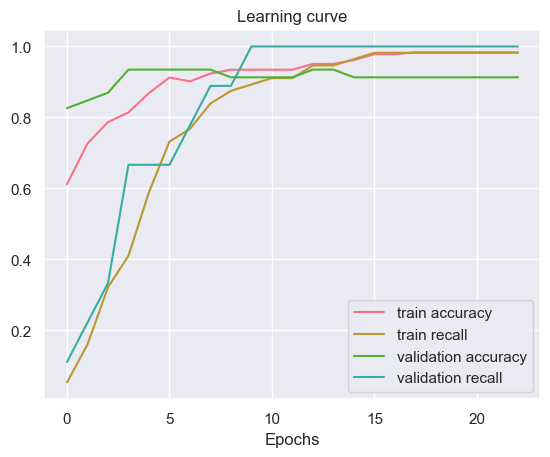

In [43]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['recall'], label = 'train recall')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.plot(history.history['val_recall'], label = 'validation recall')
plt.xlabel('Epochs')
plt.legend()
plt.title("Learning curve")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Classification report:
               precision    recall  f1-score   support

No Recurrence       0.96      0.98      0.97        56
   Recurrence       0.95      0.90      0.93        21

     accuracy                           0.96        77
    macro avg       0.96      0.94      0.95        77
 weighted avg       0.96      0.96      0.96        77



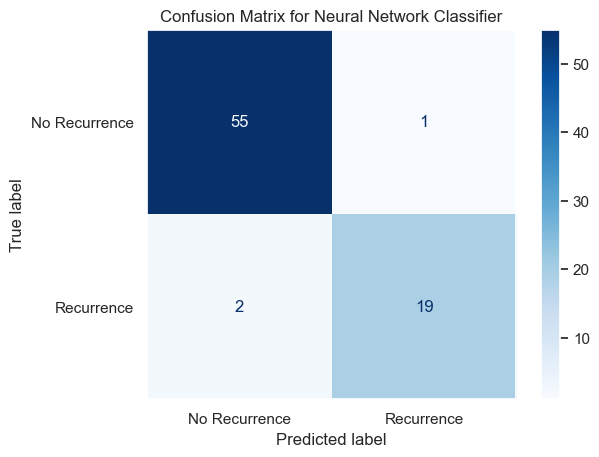

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_proba = best_model_nn.predict(X_test)

y_pred_thresh = (y_proba >= 0.5).astype(int)
print("Classification report:")
print(classification_report(y_test, y_pred_thresh, target_names=['No Recurrence', 'Recurrence']))

cm = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


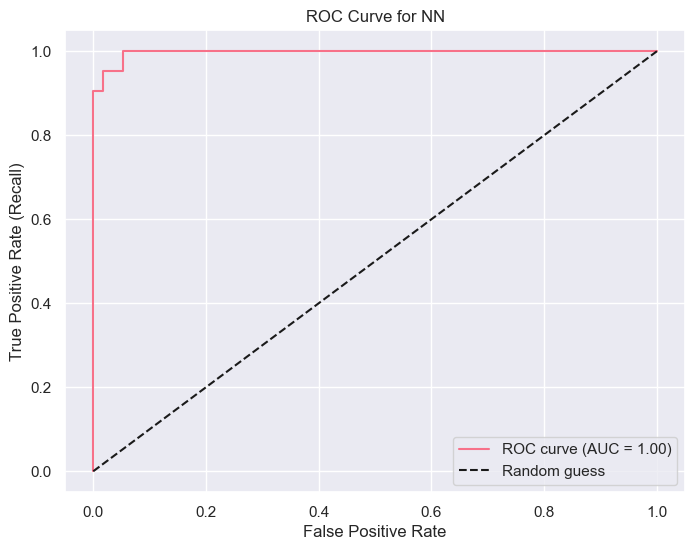

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = best_model_nn.predict(X_test)  # Output from sigmoid layer

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for NN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [46]:
# Optimize the threshold with the F1-score on the validation set
y_val_proba = best_model_nn.predict(X_val_threshold) #probabilities  on the validation set

precisions, recalls, thresholds = precision_recall_curve(y_val_threshold, y_val_proba)
#return 3 lists which correspond to the precision and 
#the recall for a corresponding threshold (choosen among y_proba)
beta = 2  # Higher beta means more importance to recall
f2_score = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)

best_threshold = thresholds[f2_score.argmax()]

print(f"\nOptimal threshold : {best_threshold:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Optimal threshold : 0.385


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification report with optimal threshold:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.91      0.95      0.93        21

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77



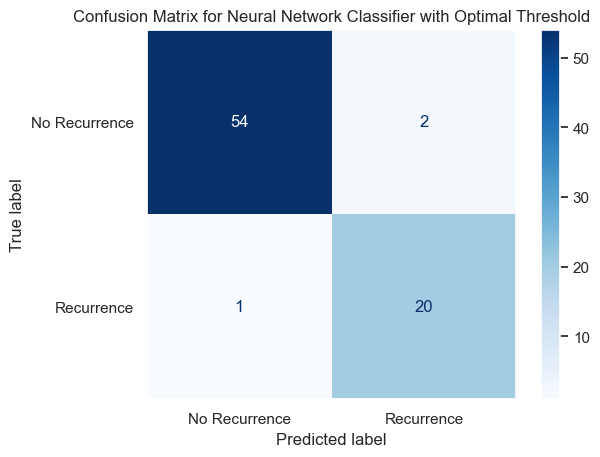

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_test_proba = best_model_nn.predict(X_test)
y_test_pred = (y_test_proba >= best_threshold).astype(int)


print("Classification report with optimal threshold:")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recurrence', 'Recurrence'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.grid(False)
plt.title('Confusion Matrix for Neural Network Classifier with Optimal Threshold')
plt.show()

In [48]:
weights = best_model_nn.get_weights()
for i, w in enumerate(best_model_nn.get_weights()):
    print(f"\nLayer {i//2 + 1} - {'Weights' if i%2==0 else 'Biases'}:")
    print(w)
    
print(len(best_model_nn.layers))
best_model_nn.summary()


Layer 1 - Weights:
[[-0.00914181  0.07832633  0.00732807 ... -0.10093664  0.10888134
  -0.2016821 ]
 [-0.15867925  0.16744958 -0.08543387 ... -0.00350518 -0.0941866
   0.12313658]
 [ 0.05932803 -0.12475932 -0.0681008  ... -0.16678175  0.09078199
   0.01052834]
 ...
 [-0.13508858 -0.12660886 -0.19271837 ... -0.09948248  0.06520379
   0.05347082]
 [-0.08203889  0.10984589  0.1009789  ... -0.22389947  0.06241176
  -0.07931641]
 [ 0.25508416 -0.07314748  0.17282651 ...  0.20589419  0.14567733
   0.1569158 ]]

Layer 1 - Biases:
[ 0.049026    0.02573396  0.0024467   0.05499492  0.04987053 -0.04165134
  0.07623556  0.00718742  0.0167649  -0.04945923  0.07482397  0.02091898
  0.02580846  0.06759874  0.01469166  0.07447141  0.0136127   0.00666393
  0.03386386 -0.02057987 -0.00845138 -0.04503473 -0.02775858 -0.02194373
  0.00261249  0.07317635 -0.03425565  0.00880662  0.08885111  0.05895462
  0.03016243  0.02122744  0.03159373  0.01995334  0.0577995   0.00687639
  0.0100046   0.08316038  0.0213

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,477 (68.27 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,652 (45.52 KB)

# Annexe

In [49]:
import contextlib
import io
import sys
import numpy as np
import tensorflow as tf

# Définition du seed global pour la reproductibilité
SEED = 42

# Configuration des seeds pour assurer la reproductibilité
np.random.seed(SEED)
tf.random.set_seed(SEED)

@contextlib.contextmanager
def suppress_output():
    old_stdout, old_stderr = sys.stdout, sys.stderr
    temp_stdout, temp_stderr = io.StringIO(), io.StringIO()
    sys.stdout, sys.stderr = temp_stdout, temp_stderr
    try:
        yield 
    finally:
        sys.stdout, sys.stderr = old_stdout, old_stderr

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
X = df_one_hot_encoder.drop(columns=['Recurred'])
y = df_one_hot_encoder['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) # stratify to maintain the distribution of the target variable since it is imbalanced

# Standardize the column "Age"
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled['Age'] = scaler.fit_transform(X_train[['Age']])

# Standardize the column "Age" in the test set (we do not fit the scaler again since we don't want to leak information from the test set)
X_test_scaled = X_test.copy()
X_test_scaled['Age'] = scaler.transform(X_test[['Age']])


## Neural Network

In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

def nn_creation(n_hidden, n_neurons, input_shape): 
    '''
    Create a NN with "n_hidden" hidden layers and "n_neurons" neurons in each hidden layer.

    Parameters:
        n_neurons is a list of integer with length n_hidden
        input_shape is a tuple representing the input shape
    
    '''
    # Reset seeds for deterministic weight initialization
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    
    model = tf.keras.Sequential()
    # input layer
    model.add(tf.keras.Input(shape=input_shape))
    
    # hidden layer(s)
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons[i], activation='relu', 
                                      kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED)))
    
    # output
    model.add(tf.keras.layers.Dense(1, activation='sigmoid',
                                  kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED)))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy','recall','precision']
    )
    return model

In [53]:
# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Define the architectures to evaluate:
architectures = [
    {"hidden_layers": 2, "neurons": [16,8]},
    {"hidden_layers": 2, "neurons": [32,16]},
    {"hidden_layers": 2, "neurons": [64,32]},
    {"hidden_layers": 3, "neurons": [32,16,8]},
    {"hidden_layers": 3, "neurons": [64,32,16]}
]

def evaluate_architecture_cv(arch, X, y, cv_folds):

    fold_scores = [] # list of dictionnaries to store scores for each fold
    
    for fold, (train_idx, val_idx) in enumerate(cv_folds.split(X, y)):
        print(f"  Fold {fold + 1}/5", end=" ")
        
        # Split data for this fold
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx] # iloc is used to maintain the index of the original dataframe
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Create and train model with stderr suppression
        model = nn_creation(arch["hidden_layers"], arch["neurons"], (X.shape[1],))
        with suppress_output():
            history = model.fit(X_fold_train, y_fold_train,
                                validation_data=(X_fold_val, y_fold_val),
                                epochs=100,
                                batch_size=32,
                                verbose=0,
                                callbacks=[early_stopping_cb],
                                class_weight={0: 1., 1: 2.}) # Adjust class weights for imbalanced data since there are 2 times more No then Yes
           
        # Evaluate on validation fold
        with suppress_output():
            loss, accuracy, recall, precision = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        
        beta = 2  # Higher beta means more importance to recall
        f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
        
        fold_scores.append({
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f2_score': f2_score
        })
        
        print(f"- Acc: {accuracy:.3f}, Recall: {recall:.3f}, f2: {f2_score:.3f}")
        
        # Clear session to avoid memory issues
        tf.keras.backend.clear_session()
    
    # Calculate mean for each metric
    mean_scores = {
        'accuracy': np.mean([s['accuracy'] for s in fold_scores]),
        'recall': np.mean([s['recall'] for s in fold_scores]),
        'precision': np.mean([s['precision'] for s in fold_scores]),
        'f2_score': np.mean([s['f2_score'] for s in fold_scores])
    }
    
    return mean_scores

In [54]:
## 3 minutes to run
print("Starting Cross-Validation for Architecture Selection... (3mn) \n")

results = []
best_f2 = 0
best_arch = None

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Define the architectures to evaluate:
architectures = [
    {"hidden_layers": 2, "neurons": [16,8]},
    {"hidden_layers": 2, "neurons": [32,16]},
    {"hidden_layers": 2, "neurons": [64,32]},
    {"hidden_layers": 3, "neurons": [32,16,8]},
    {"hidden_layers": 3, "neurons": [64,32,16]}
]

def evaluate_architecture_cv(arch, X, y, cv_folds):

    fold_scores = [] # list of dictionnaries to store scores for each fold
    
    for fold, (train_idx, val_idx) in enumerate(cv_folds.split(X, y)):
        print(f"  Fold {fold + 1}/5", end=" ")
        
        # Split data for this fold
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx] # iloc is used to maintain the index of the original dataframe
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Create and train model with stderr suppression
        model = nn_creation(arch["hidden_layers"], arch["neurons"], (X.shape[1],))
        with suppress_output():
            history = model.fit(X_fold_train, y_fold_train,
                                validation_data=(X_fold_val, y_fold_val),
                                epochs=100,
                                batch_size=32,
                                verbose=0,
                                callbacks=[early_stopping_cb],
                                class_weight={0: 1., 1: 2.}) # Adjust class weights for imbalanced data since there are 2 times more No then Yes
           
        # Evaluate on validation fold
        with suppress_output():
            loss, accuracy, recall, precision = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        
        beta = 2  # Higher beta means more importance to recall
        f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
        
        fold_scores.append({
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f2_score': f2_score
        })
        
        print(f"- Acc: {accuracy:.3f}, Recall: {recall:.3f}, f2: {f2_score:.3f}")
        
        # Clear session to avoid memory issues
        tf.keras.backend.clear_session()
    
    # Calculate mean for each metric
    mean_scores = {
        'accuracy': np.mean([s['accuracy'] for s in fold_scores]),
        'recall': np.mean([s['recall'] for s in fold_scores]),
        'precision': np.mean([s['precision'] for s in fold_scores]),
        'f2_score': np.mean([s['f2_score'] for s in fold_scores])
    }
    
    return mean_scores

for i, arch in enumerate(architectures):
    print(f"\nEvaluating Architecture {i+1}/5: {arch}")
    
    mean_scores = evaluate_architecture_cv(arch, X_train, y_train, kfold)
    
    results.append({
        'architecture': arch,
        'mean_scores': mean_scores
    })
    
    print(f"Results Mean F2: {mean_scores['f2_score']:.3f}")
    print(f"        Mean Acc: {mean_scores['accuracy']:.3f}")
    print(f"        Mean Recall: {mean_scores['recall']:.3f}")
    
    # Track best architecture based on F2 score
    if mean_scores['f2_score'] > best_f2:
        best_f2 = mean_scores['f2_score']
        best_arch = arch

print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS SUMMARY")
print("="*60)

for i, result in enumerate(results):
    arch = result['architecture']
    mean = result['mean_scores']
    
    print(f"\nArchitecture {i+1}: {arch['hidden_layers']} layers, {arch['neurons']} neurons")
    print(f"  F2 Score:  {mean['f2_score']:.3f}")
    print(f"  Accuracy:  {mean['accuracy']:.3f}")
    print(f"  Recall:    {mean['recall']:.3f}")
    print(f"  Precision: {mean['precision']:.3f}")



Starting Cross-Validation for Architecture Selection... (3mn) 


Evaluating Architecture 1/5: {'hidden_layers': 2, 'neurons': [16, 8]}
  Fold 1/5 

2025-06-06 11:45:21.888082: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-06-06 11:45:21.889481: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.919, Recall: 0.833, f2: 0.843
  Fold 2/5 

2025-06-06 11:45:40.550828: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:40.551503: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.902, Recall: 0.824, f2: 0.824
  Fold 3/5 

2025-06-06 11:45:50.421725: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:50.422359: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 1.000, Recall: 1.000, f2: 1.000
  Fold 4/5 

2025-06-06 11:45:58.651874: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:45:58.652579: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.918, Recall: 0.941, f2: 0.909
  Fold 5/5 

2025-06-06 11:46:07.591296: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:07.591894: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.934, Recall: 0.882, f2: 0.882
Results Mean F2: 0.892
        Mean Acc: 0.935
        Mean Recall: 0.896

Evaluating Architecture 2/5: {'hidden_layers': 2, 'neurons': [32, 16]}
  Fold 1/5 

2025-06-06 11:46:16.345045: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:16.345636: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.935, Recall: 0.889, f2: 0.889
  Fold 2/5 

2025-06-06 11:46:24.981809: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:24.982393: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.934, Recall: 0.824, f2: 0.843
  Fold 3/5 

2025-06-06 11:46:33.445980: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:33.446615: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.967, Recall: 0.941, f2: 0.941
  Fold 4/5 

2025-06-06 11:46:39.585337: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:39.585885: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.902, Recall: 0.882, f2: 0.862
  Fold 5/5 

2025-06-06 11:46:45.293361: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:45.294064: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.934, Recall: 0.941, f2: 0.920
Results Mean F2: 0.891
        Mean Acc: 0.935
        Mean Recall: 0.895

Evaluating Architecture 3/5: {'hidden_layers': 2, 'neurons': [64, 32]}
  Fold 1/5 

2025-06-06 11:46:51.822930: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:46:51.823486: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.935, Recall: 0.889, f2: 0.889
  Fold 2/5 

2025-06-06 11:47:00.626276: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:00.626907: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.984, Recall: 0.941, f2: 0.952
  Fold 3/5 

2025-06-06 11:47:07.380668: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:07.381244: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.967, Recall: 0.941, f2: 0.941
  Fold 4/5 - Acc: 0.902, Recall: 0.941, f2: 0.899
  Fold 5/5 

2025-06-06 11:47:12.680093: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:12.680753: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.918, Recall: 0.882, f2: 0.872
Results Mean F2: 0.911
        Mean Acc: 0.941
        Mean Recall: 0.919

Evaluating Architecture 4/5: {'hidden_layers': 3, 'neurons': [32, 16, 8]}
  Fold 1/5 

2025-06-06 11:47:23.781853: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:23.782454: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.935, Recall: 0.889, f2: 0.889
  Fold 2/5 

2025-06-06 11:47:31.446277: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:31.447086: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.902, Recall: 0.824, f2: 0.824
  Fold 3/5 

2025-06-06 11:47:39.917953: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:39.918753: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.967, Recall: 0.941, f2: 0.941
  Fold 4/5 

2025-06-06 11:47:45.168690: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:47:45.169279: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.918, Recall: 0.882, f2: 0.872
  Fold 5/5 - Acc: 0.918, Recall: 0.882, f2: 0.872
Results Mean F2: 0.880
        Mean Acc: 0.928
        Mean Recall: 0.884

Evaluating Architecture 5/5: {'hidden_layers': 3, 'neurons': [64, 32, 16]}
  Fold 1/5 

2025-06-06 11:47:50.456521: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-06-06 11:47:50.457112: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.935, Recall: 0.889, f2: 0.889
  Fold 2/5 

2025-06-06 11:48:03.521705: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:48:03.522318: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.984, Recall: 0.941, f2: 0.952
  Fold 3/5 

2025-06-06 11:48:09.338333: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:48:09.338927: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.984, Recall: 0.941, f2: 0.952
  Fold 4/5 - Acc: 0.902, Recall: 0.882, f2: 0.862
  Fold 5/5 

2025-06-06 11:48:15.090378: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:48:15.090933: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Acc: 0.918, Recall: 0.882, f2: 0.872
Results Mean F2: 0.906
        Mean Acc: 0.944
        Mean Recall: 0.907

CROSS-VALIDATION RESULTS SUMMARY

Architecture 1: 2 layers, [16, 8] neurons
  F2 Score:  0.892
  Accuracy:  0.935
  Recall:    0.896
  Precision: 0.878

Architecture 2: 2 layers, [32, 16] neurons
  F2 Score:  0.891
  Accuracy:  0.935
  Recall:    0.895
  Precision: 0.879

Architecture 3: 2 layers, [64, 32] neurons
  F2 Score:  0.911
  Accuracy:  0.941
  Recall:    0.919
  Precision: 0.885

Architecture 4: 3 layers, [32, 16, 8] neurons
  F2 Score:  0.880
  Accuracy:  0.928
  Recall:    0.884
  Precision: 0.864

Architecture 5: 3 layers, [64, 32, 16] neurons
  F2 Score:  0.906
  Accuracy:  0.944
  Recall:    0.907
  Precision: 0.902


In [55]:
print(f"\n{'='*60}")
print(f"BEST ARCHITECTURE: {best_arch['hidden_layers']} hidden layer(s) with {best_arch['neurons']} neurons")
print(f"Best CV F2 Score: {best_f2:.3f}")
print(f"{'='*60}\n")

# Train final model with best architecture on full training set
print("Training final model with best architecture on full training set...")
best_model_nn = nn_creation(best_arch["hidden_layers"], best_arch["neurons"], (X_train.shape[1],))

history = best_model_nn.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=0,
                    callbacks=[early_stopping_cb],
                    class_weight={0: 1., 1: 2.})

# Final evaluation on test set
loss, accuracy, recall, precision = best_model_nn.evaluate(X_test, y_test)
beta = 2  
test_f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)

print("\nFINAL TEST RESULTS:")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test Recall: {recall:.3f}")
print(f"Test Precision: {precision:.3f}")
print(f"Test F2 Score: {test_f2:.3f}")


BEST ARCHITECTURE: 2 hidden layer(s) with [64, 32] neurons
Best CV F2 Score: 0.911

Training final model with best architecture on full training set...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9337 - loss: 0.1479 - precision: 0.8524 - recall: 0.9420

FINAL TEST RESULTS:
Test Accuracy: 0.922
Test Recall: 0.909
Test Precision: 0.833
Test F2 Score: 0.893


2025-06-06 11:48:22.027022: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-06-06 11:48:22.027943: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

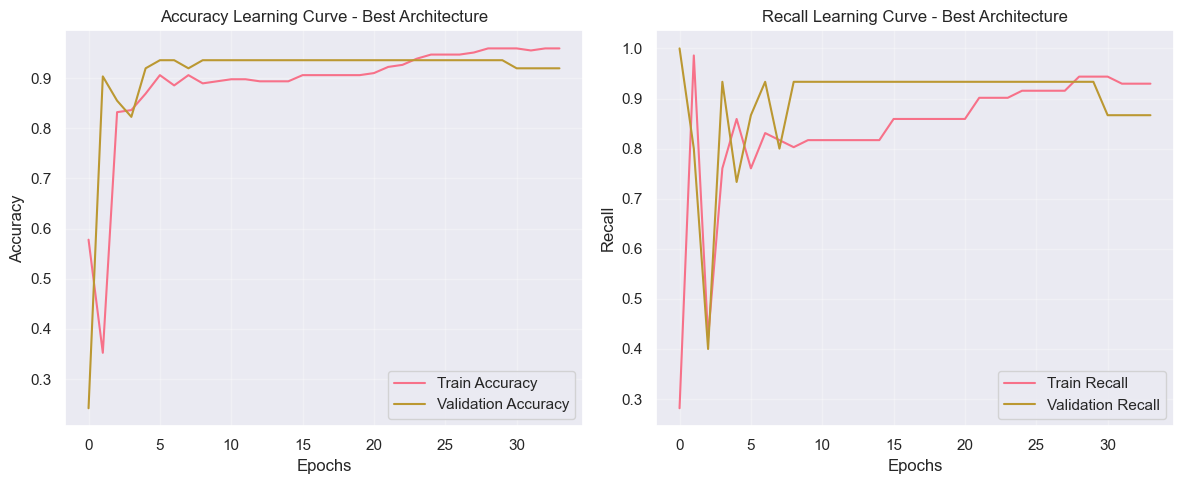

In [56]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Learning Curve - Best Architecture')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall Learning Curve - Best Architecture')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


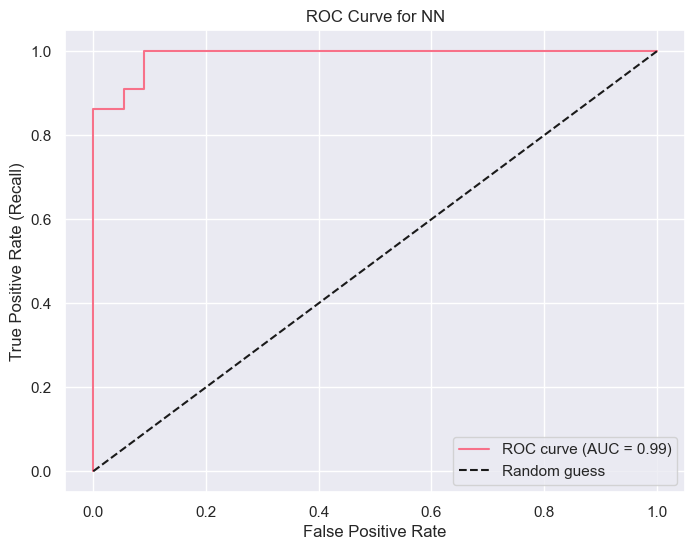

In [57]:
# 1. Predict the probabilities
y_proba = best_model_nn.predict(X_test)  # Output from sigmoid layer

# 2. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for NN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [58]:
# Cross-validation for threshold optimization (20 seconds to run)

def find_best_threshold_cv(model_func, X, y, cv_folds=5):
    """Find the best threshold using cross-validation"""
    
    # Get cross-validated probabilities
    kfold_thresh = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=SEED)
    
    all_y_true = []
    all_y_proba = []
    
    print(f"Performing {cv_folds}-fold cross-validation for threshold optimization...")
    
    for fold, (train_idx, val_idx) in enumerate(kfold_thresh.split(X, y)):
        print(f"Fold {fold + 1}/{cv_folds}", end=" ")
        
        # Split data
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train model for this fold
        model = model_func()
        with suppress_output():
            model.fit(X_fold_train, y_fold_train,
                        epochs=70, 
                        batch_size=32,
                        verbose=0,
                        callbacks=[early_stopping_cb],
                        class_weight={0: 1., 1: 2.})
        # Get predictions on validation fold
        
        y_proba_fold = model.predict(X_fold_val, verbose=0)
        
        all_y_true.extend(y_fold_val)
        all_y_proba.extend(y_proba_fold.flatten())
        
        # Clear session
        tf.keras.backend.clear_session()
    
    # Convert to numpy arrays
    all_y_true = np.array(all_y_true)
    all_y_proba = np.array(all_y_proba)
    
    # Find best threshold using precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(all_y_true, all_y_proba)
    
    beta = 2  
    weighted_f_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)
    
    best_idx = weighted_f_scores.argmax()
    best_threshold = thresholds[best_idx]
    best_weighted_f = weighted_f_scores[best_idx]
    
    print(f"Using F-beta score with beta={beta}")
    
    return best_threshold, best_weighted_f, precisions, recalls, thresholds

# Create a function to generate our best model
def create_best_model():
    return nn_creation(best_arch["hidden_layers"], best_arch["neurons"], (X_train.shape[1],))

# Find best threshold using cross-validation
best_threshold_cv, best_weighted_f_cv, precisions, recalls, thresholds = find_best_threshold_cv(
    create_best_model, X_train, y_train, cv_folds=5
)

print(f"\nBest threshold from CV (optimize F2): {best_threshold_cv:.3f}")

Performing 5-fold cross-validation for threshold optimization...
Fold 1/5 WARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3632e8400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2025-06-06 11:48:27.080093: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-06-06 11:48:27.080964: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Fold 2/5 WARNING:tensorflow:6 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3625fefc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
Fold 3/5 

2025-06-06 11:48:32.446108: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-06-06 11:48:32.447041: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Fold 4/5 

2025-06-06 11:48:41.538297: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-06-06 11:48:41.538948: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Fold 5/5 Using F-beta score with beta=2

Best threshold from CV (optimize F2): 0.287


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


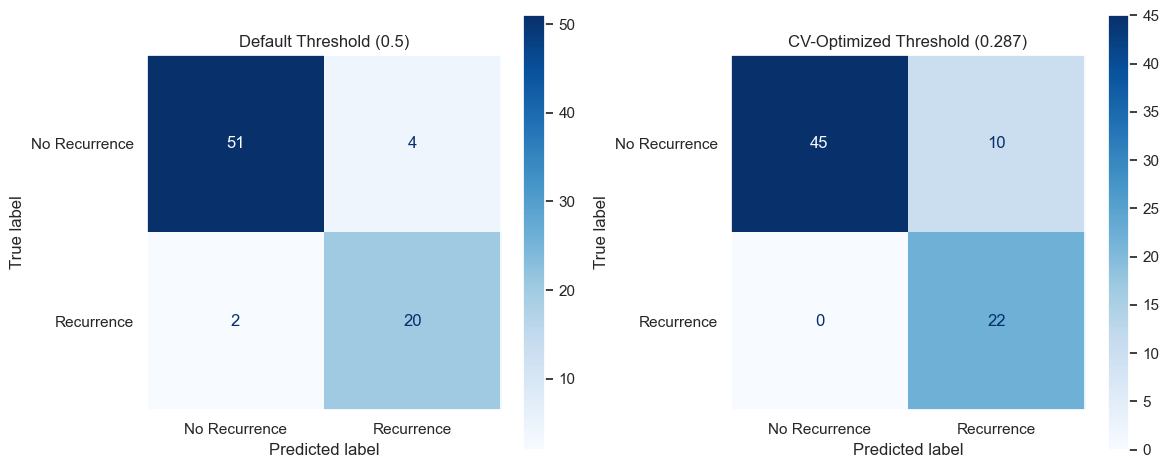

In [59]:
# Final evaluation with CV-optimized threshold on test set
y_test_proba_final = best_model_nn.predict(X_test)
y_test_pred_cv_thresh = (y_test_proba_final >= best_threshold_cv).astype(int)
y_test_pred_default = (y_test_proba_final >= 0.5).astype(int)

# Show confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Default threshold
cm_default = confusion_matrix(y_test, y_test_pred_default)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['No Recurrence', 'Recurrence'])
disp1.plot(ax=ax1, cmap=plt.cm.Blues, values_format='d')
ax1.set_title('Default Threshold (0.5)')
ax1.grid(False)
# CV-optimized threshold
cm_cv = confusion_matrix(y_test, y_test_pred_cv_thresh)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=['No Recurrence', 'Recurrence'])
disp2.plot(ax=ax2, cmap=plt.cm.Blues, values_format='d')
ax2.set_title(f'CV-Optimized Threshold ({best_threshold_cv:.3f})')
ax2.grid(False)
plt.tight_layout()

plt.show()